In [179]:
import pandas as pd
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
#Getting Data
path = 'sqlite:////content/drive/MyDrive/code/Data_Set/Video_Game_Sales.db'
df = pd.read_sql_table('df', path) 
platform_df= pd.read_sql_table("platform_df", path)
yor_df= pd.read_sql_table("yor_df", path)
rating_df= pd.read_sql_table("rating_df", path)
publisher_df= pd.read_sql_table("publisher_df",path)
genre_df= pd.read_sql_table("genre_df",path)

In [181]:
#Merging to one table
df = df.merge(platform_df, left_on='Plat_id', right_on='Plat_id', how='inner')\
      .drop(columns=['Plat_id'])
df = df.merge(genre_df, left_on='Genre_id', right_on='Genre_id', how='inner')\
      .drop(columns=['Genre_id'])
df = df.merge(yor_df, left_on='YoR_id', right_on='YoR_id', how='inner')\
      .drop(columns=['YoR_id'])
df = df.merge(publisher_df, left_on='Publisher_id', right_on='Publisher_id', how='inner')\
      .drop(columns=['Publisher_id'])
df = df.merge(rating_df, left_on='Rating_id', right_on='Rating_id', how='inner')\
      .drop(columns=['Rating_id'])
df = df.set_index('index').sort_values('index')

In [182]:
#4. Shape the data
df.shape

(16717, 12)

In [183]:
#5. Show first five records
df.head()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Platform,Genre,Year_of_Release,Publisher,Rating
index,,,,,,,,,,,,
0,Wii Sports,41.36,28.96,3.77,8.45,76.0,8.0,Wii,Sports,2006.0,Nintendo,E
1,Super Mario Bros.,29.08,3.58,6.81,0.77,NaN,NaN,NES,Platform,1985.0,Nintendo,None
2,Mario Kart Wii,15.68,12.76,3.79,3.29,82.0,8.3,Wii,Racing,2008.0,Nintendo,E
3,Wii Sports Resort,15.61,10.93,3.28,2.95,80.0,8.0,Wii,Sports,2009.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,11.27,8.89,10.22,1.00,NaN,NaN,GB,Role-Playing,1996.0,Nintendo,None


In [184]:
#6. Show all columns of the dataframe
df.columns

Index(['Name', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales',
       'Critic_Score', 'User_Score', 'Platform', 'Genre', 'Year_of_Release',
       'Publisher', 'Rating'],
      dtype='object')

In [185]:
#7. Show last 5 five rows
df.tail()

,Name,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score,Platform,Genre,Year_of_Release,Publisher,Rating
index,,,,,,,,,,,,
16714,Samurai Warriors: Sanada Maru,0.00,0.00,0.01,0.0,NaN,NaN,PS3,Action,2016.0,Tecmo Koei,None
16715,LMA Manager 2007,0.00,0.01,0.00,0.0,NaN,NaN,X360,Sports,2006.0,Codemasters,None
16716,Haitaka no Psychedelica,0.00,0.00,0.01,0.0,NaN,NaN,PSV,Adventure,2016.0,Idea Factory,None
16717,Spirits & Spells,0.01,0.00,0.00,0.0,NaN,NaN,GBA,Platform,2003.0,Wanadoo,None
16718,Winning Post 8 2016,0.00,0.00,0.01,0.0,NaN,NaN,PSV,Simulation,2016.0,Tecmo Koei,None


In [186]:
#8. Describe the data.
df.describe()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,User_Score
count,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,7590.000000
mean,0.263255,0.145010,0.077610,0.047333,68.967679,7.125046
std,0.813475,0.503303,0.308836,0.186721,13.938165,1.500006
min,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,60.000000,6.400000
50%,0.080000,0.020000,0.000000,0.010000,71.000000,7.500000
75%,0.240000,0.110000,0.040000,0.030000,79.000000,8.200000
max,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


In [187]:
#9. Group the sales data of each region on Year_of_Release and plot the same 
sales_by_year_df = df.groupby('Year_of_Release')[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()
sales_by_year_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
1980.0,10.59,0.67,0.00,0.12
1981.0,33.40,1.96,0.00,0.32
1982.0,26.92,1.65,0.00,0.31
1983.0,7.76,0.80,8.10,0.14
1984.0,33.28,2.10,14.27,0.70
1985.0,33.73,4.74,14.56,0.92
1986.0,12.50,2.84,19.81,1.93
1987.0,8.46,1.41,11.63,0.20
1988.0,23.87,6.59,15.76,0.99


In [188]:
sales_by_year_df.nlargest(1,columns='NA_Sales')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2008.0,348.69,181.14,60.25,81.42


In [189]:
sales_by_year_df.nlargest(1,'EU_Sales')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2009.0,335.55,187.94,61.89,73.44


In [190]:
sales_by_year_df.nlargest(1,'JP_Sales')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2006.0,262.13,127.89,73.74,53.95


In [191]:
sales_by_year_df.nlargest(1,'Other_Sales')

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Year_of_Release,,,,
2008.0,348.69,181.14,60.25,81.42


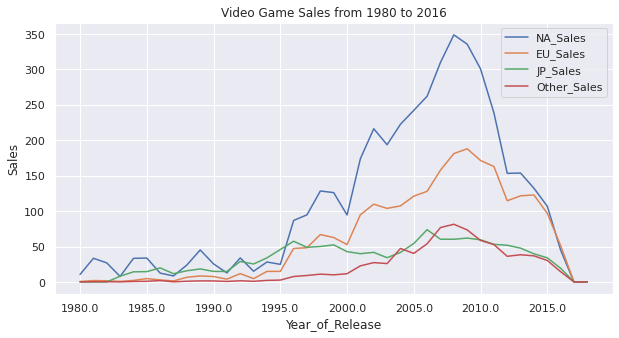

In [192]:
sales_by_year_df.plot(figsize=(10,5), 
                      title= 'Video Game Sales from 1980 to 2016',
                      ylabel = "Sales")

Figure shows the sales for each region over years.

In [193]:
#10. Group North American, Japan, European & Other region sales data as per Genre and
#plot it
genre_by_region_df = df.groupby('Genre')[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()
genre_by_region_df


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,879.01,519.13,161.44,184.60
Adventure,105.26,63.54,52.30,16.49
Fighting,223.36,100.33,87.48,36.36
Misc,407.27,212.74,108.11,74.39
Platform,445.50,200.35,130.83,51.09
Puzzle,122.87,50.01,57.31,12.38
Racing,359.35,236.51,56.71,76.10
Role-Playing,330.81,188.71,355.46,59.63
Shooter,592.24,317.34,38.76,104.11


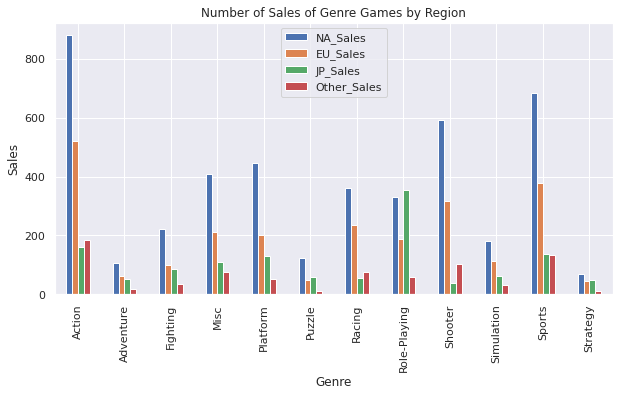

In [194]:
genre_by_region_df.plot(kind='bar', figsize =(10, 5), title ='Number of Sales of Genre Games by Region', ylabel='Sales')

Figure above shows the sales of each genre by region.

In [195]:
#11. Group North American, Japan, European & Other region sales data as per Platform
#and plot it
platform_by_region_df = df.groupby('Platform')[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']].sum()
platform_by_region_df

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Platform,,,,
2600,90.60,5.47,0.00,0.91
3DO,0.00,0.00,0.10,0.00
3DS,83.49,61.48,100.67,13.36
DC,5.43,1.69,8.56,0.27
DS,382.67,188.89,175.57,59.28
GB,114.32,47.82,85.12,8.20
GBA,187.54,75.25,47.33,7.73
GC,133.46,38.71,21.58,5.18
GEN,19.27,5.52,2.67,0.89


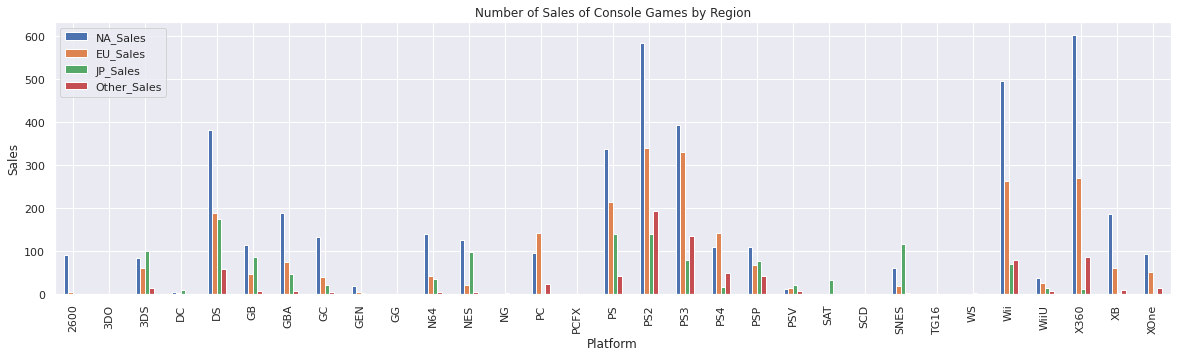

In [196]:
platform_by_region_df.plot(kind='bar', figsize =(20, 5), title ='Number of Sales of Console Games by Region', ylabel='Sales' )

Figure above shows the sales of each platform by region.

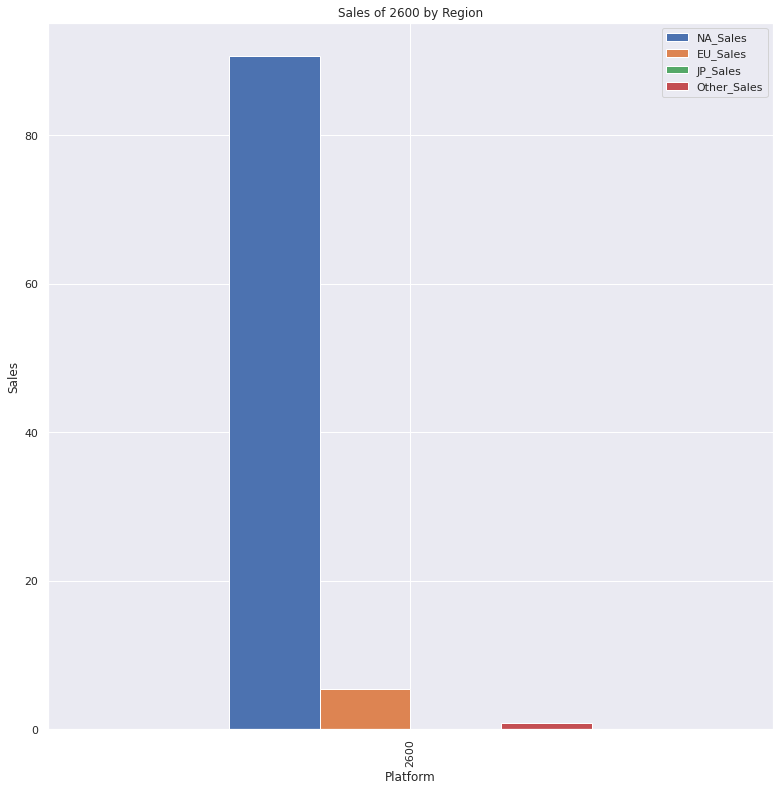

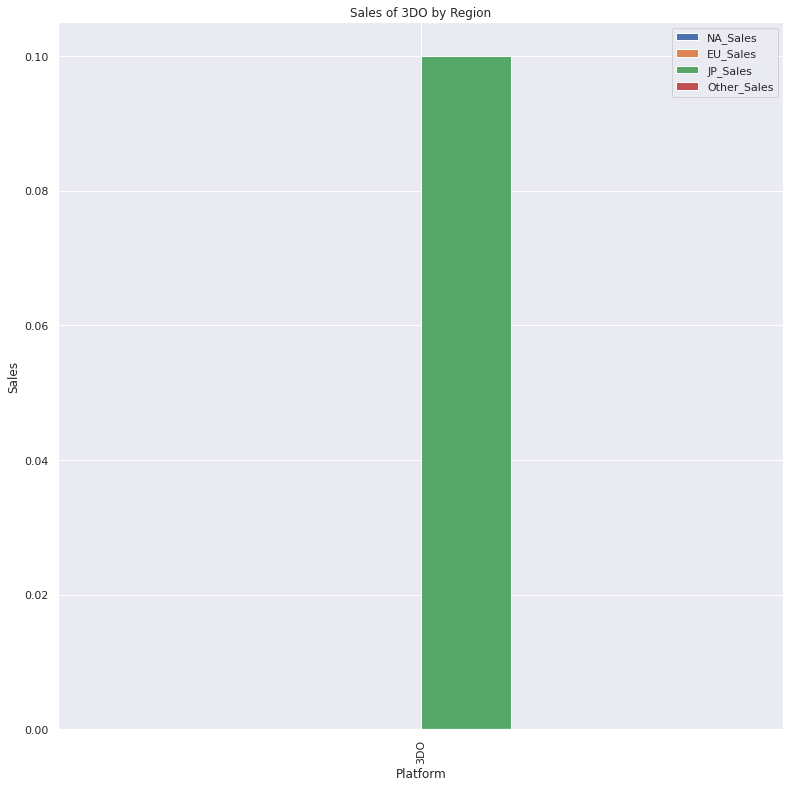

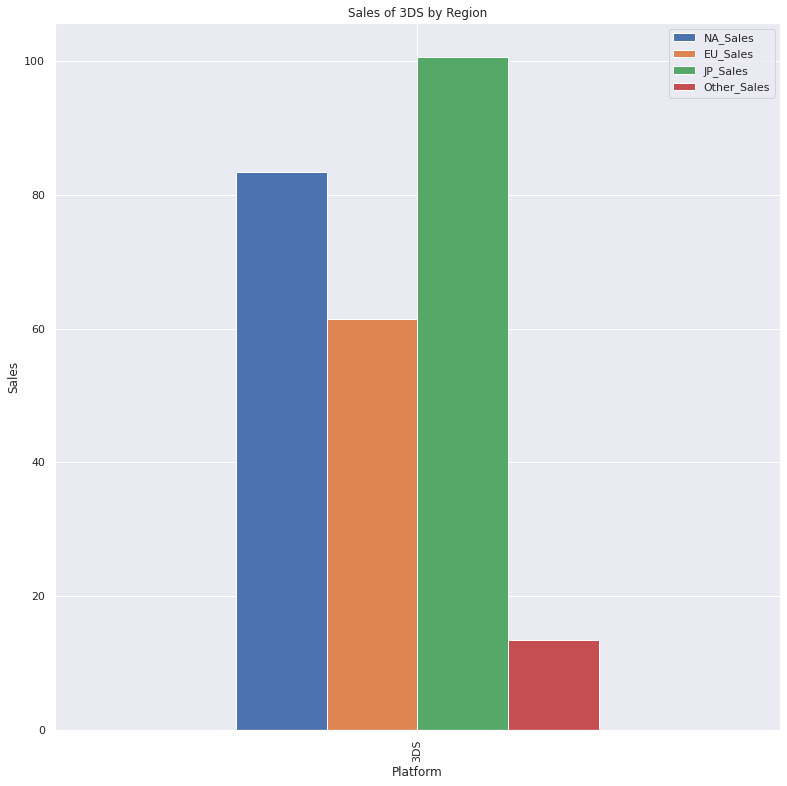

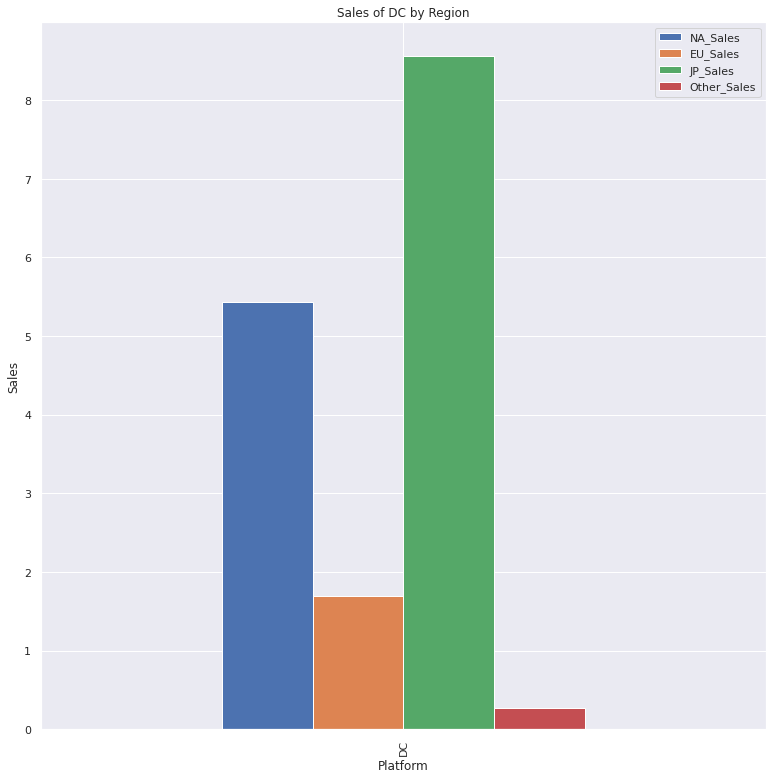

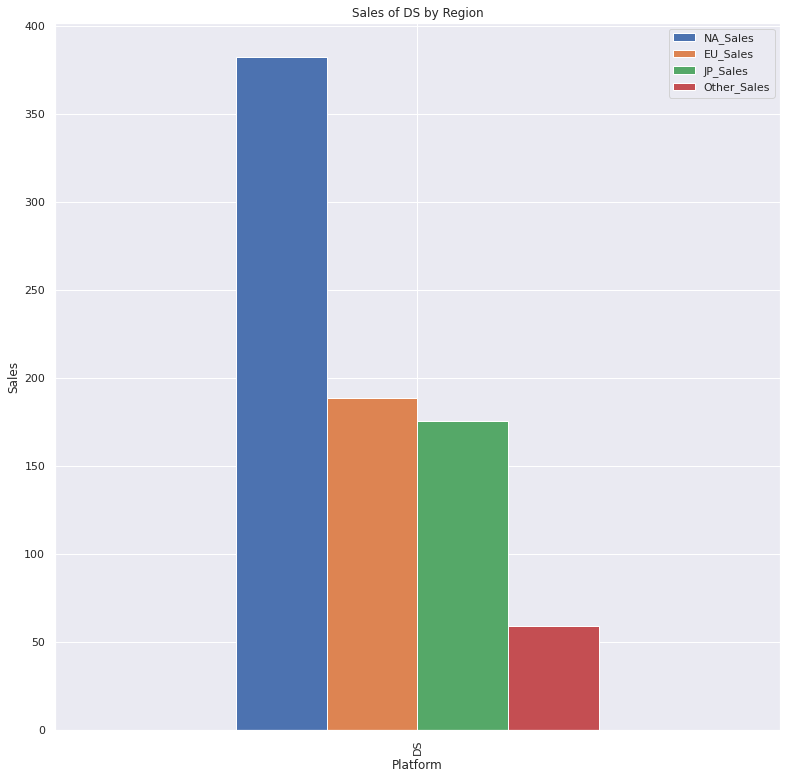

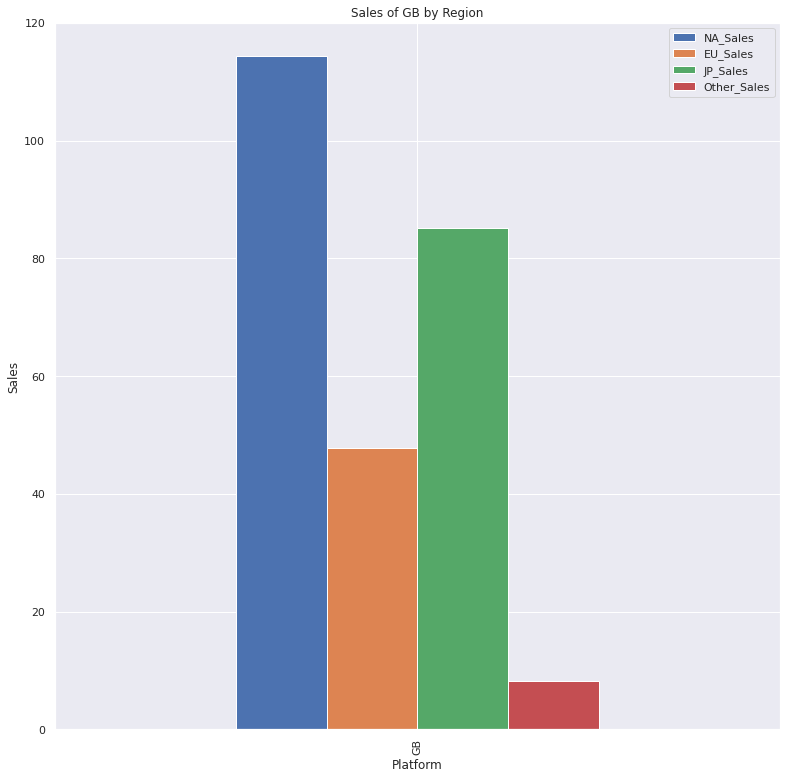

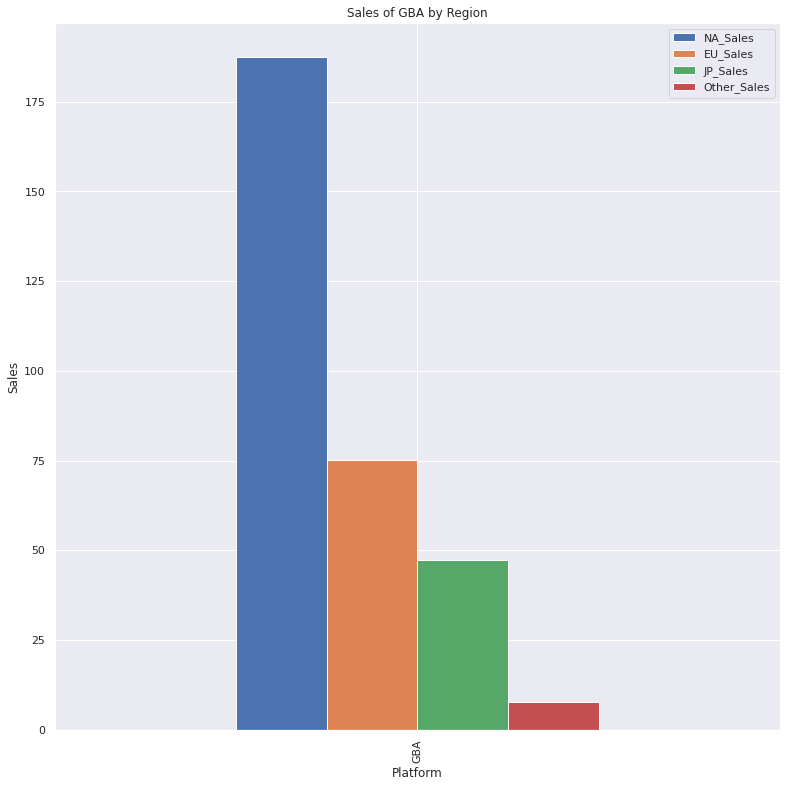

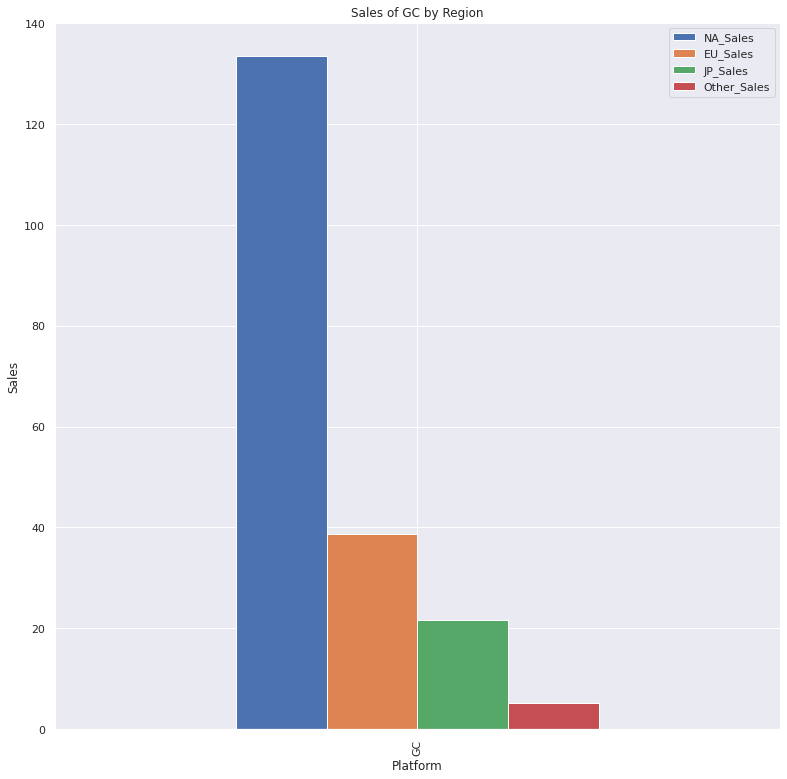

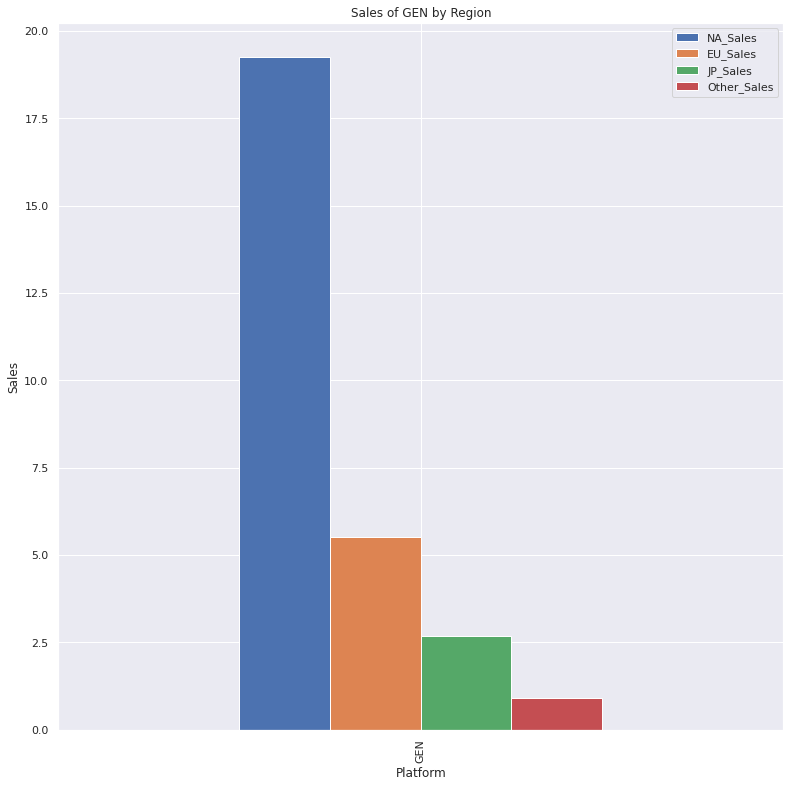

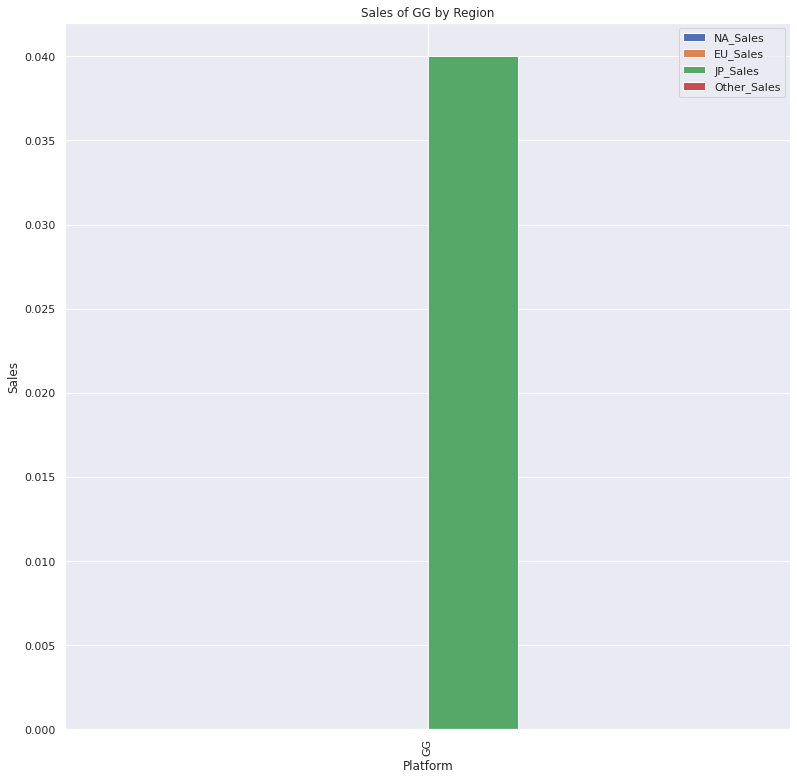

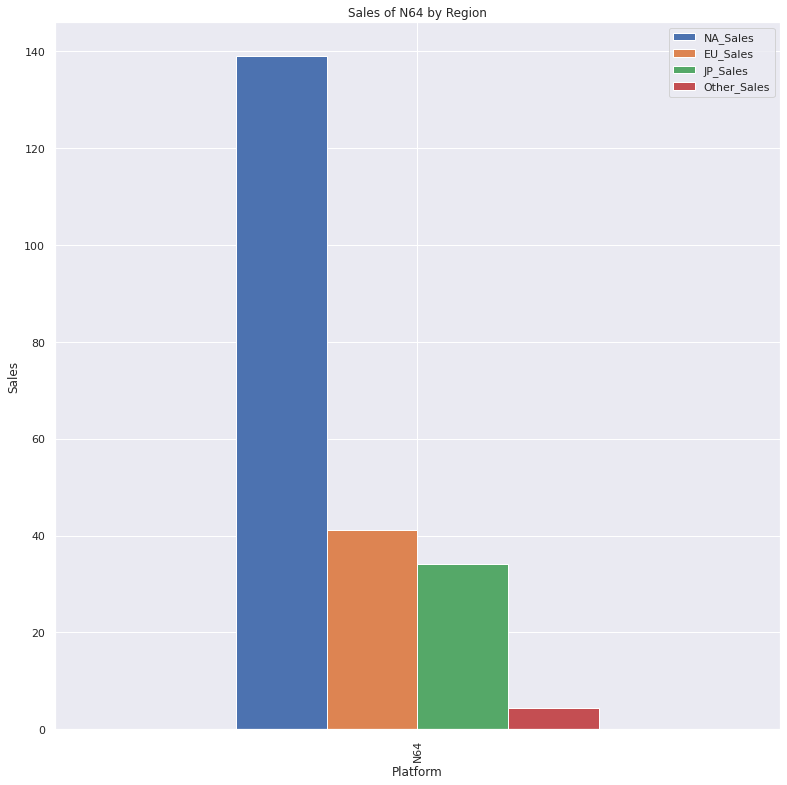

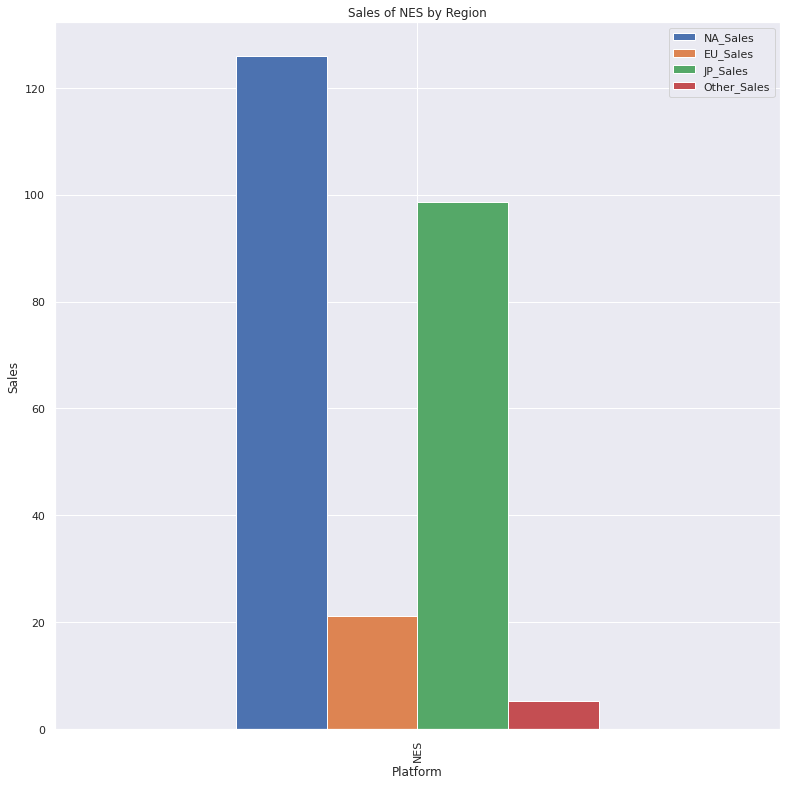

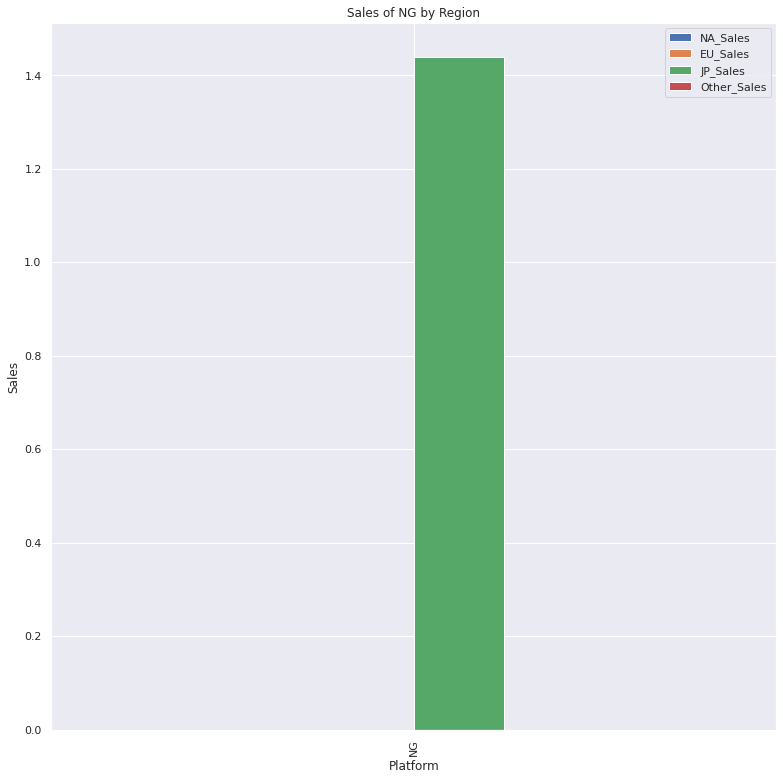

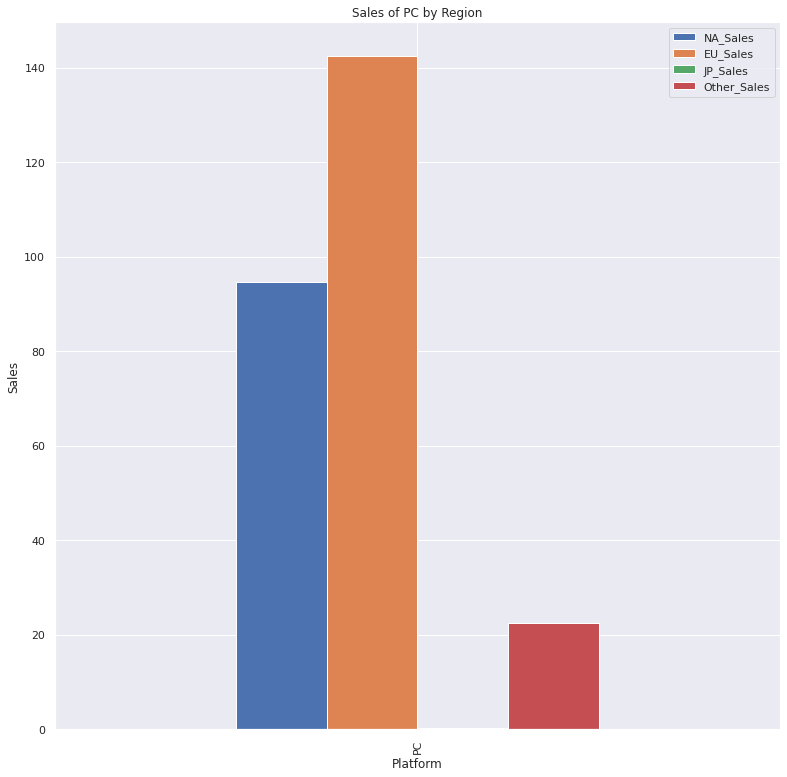

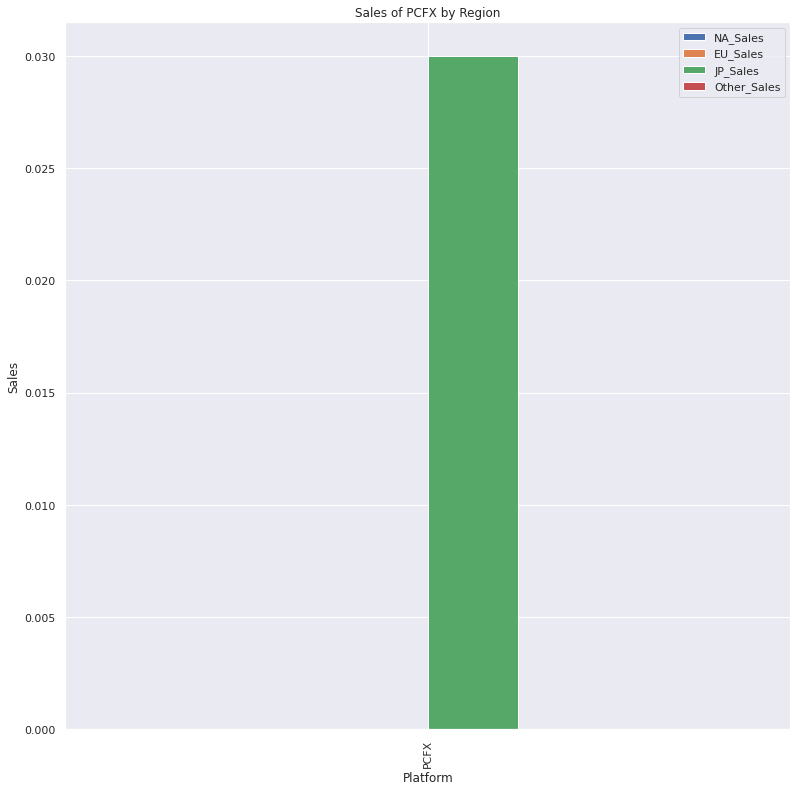

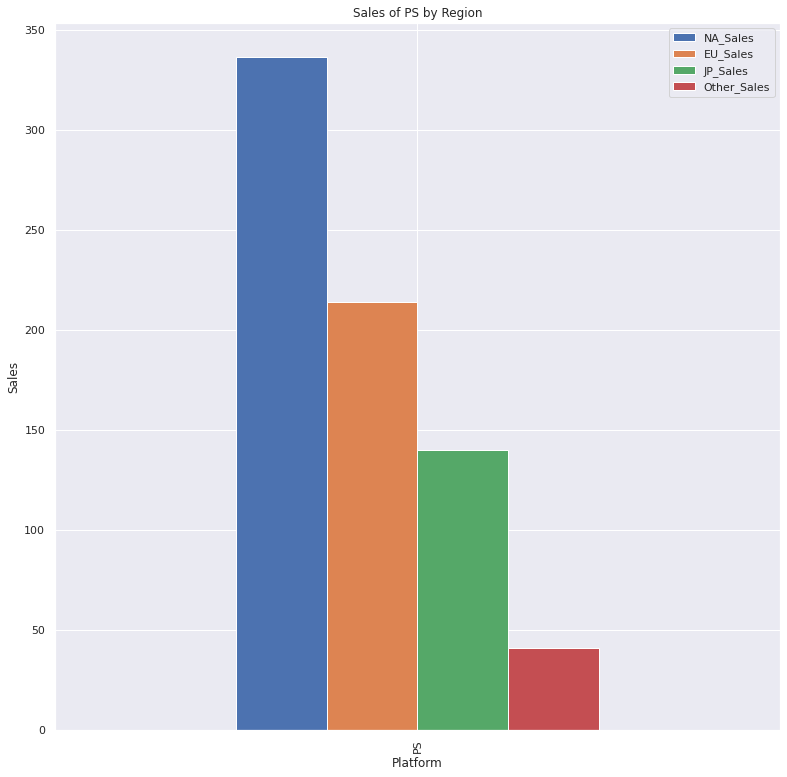

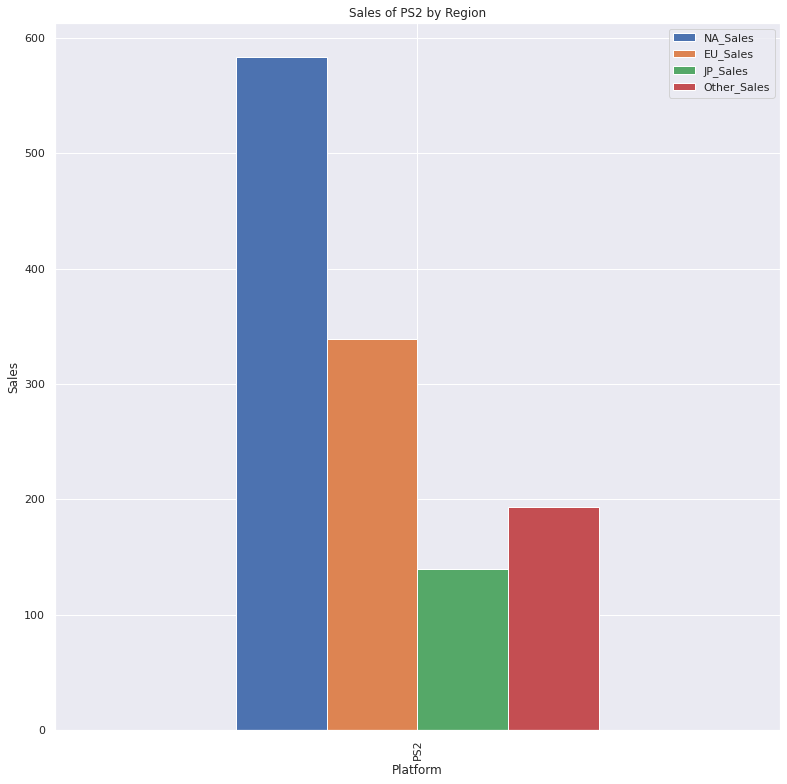

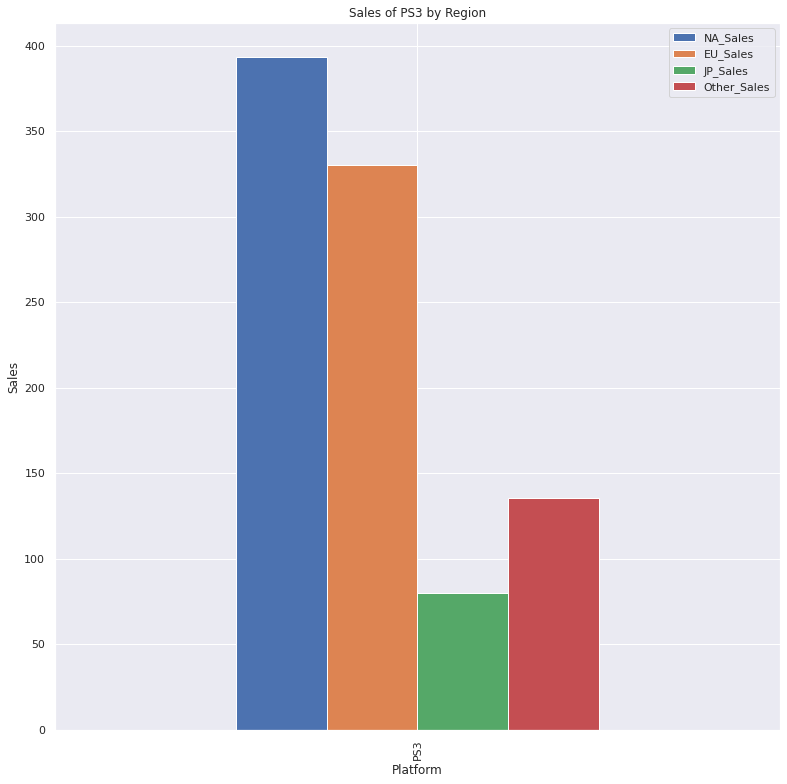

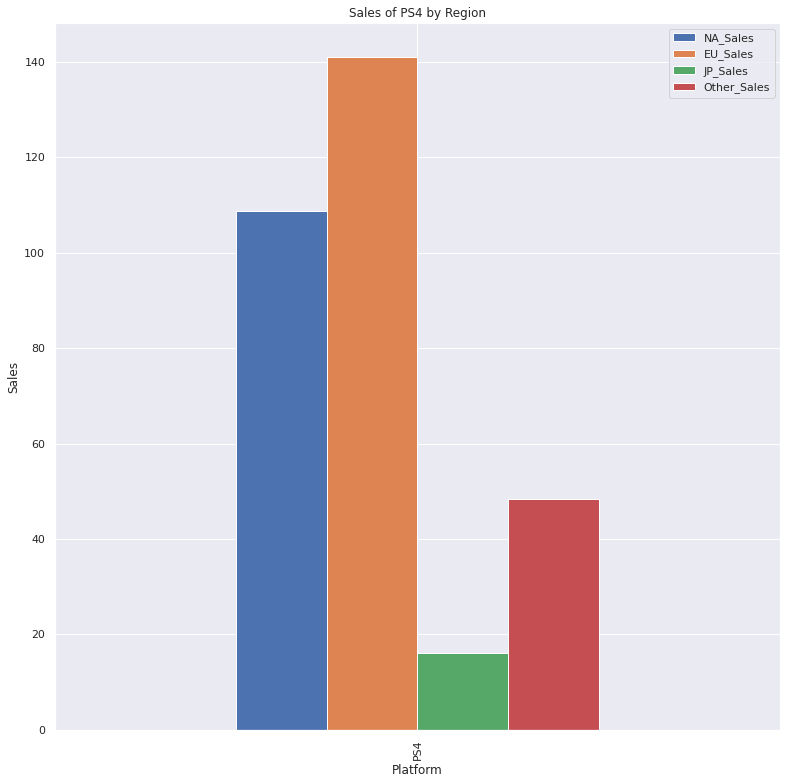

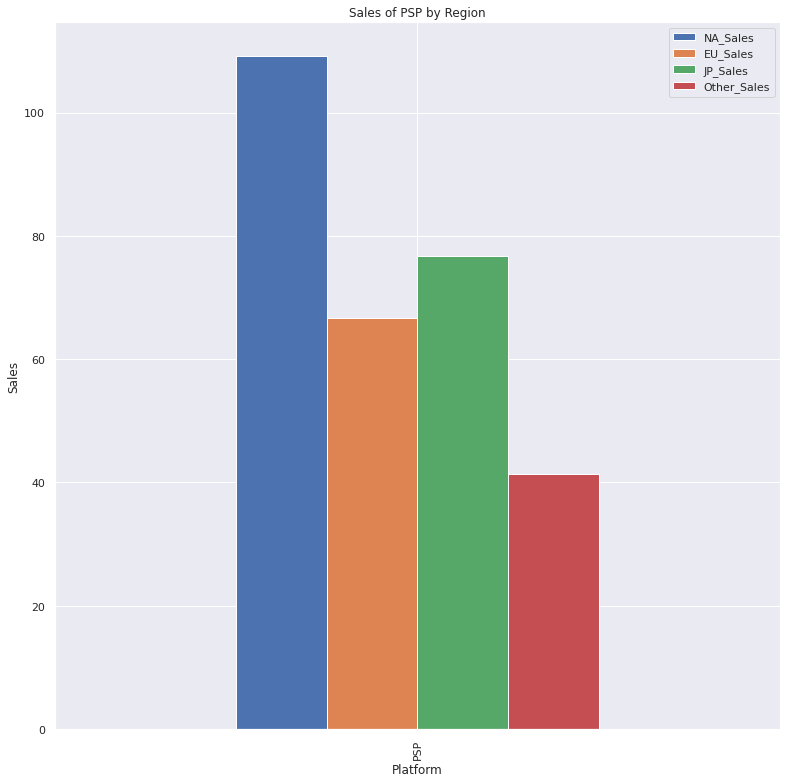

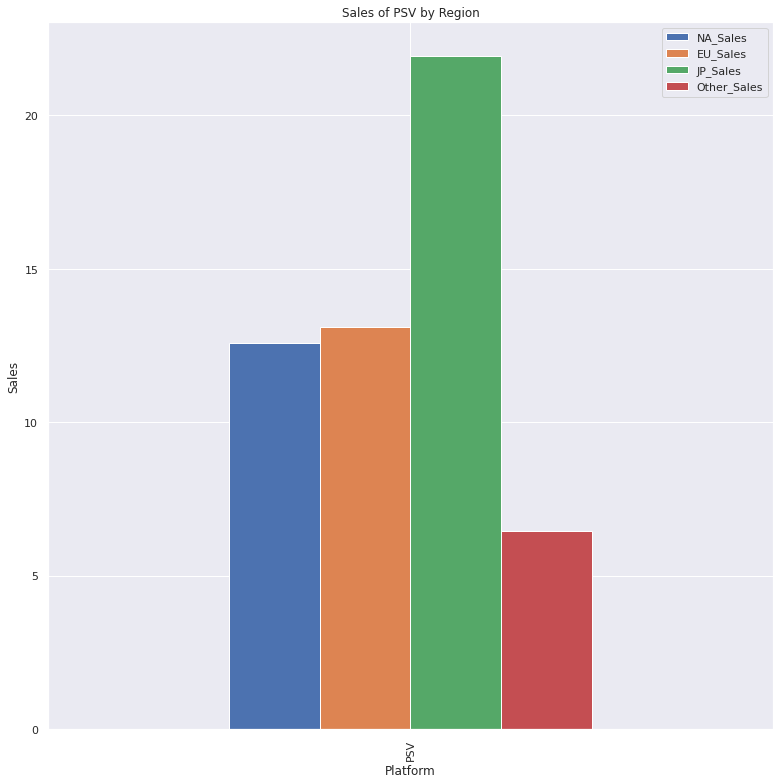

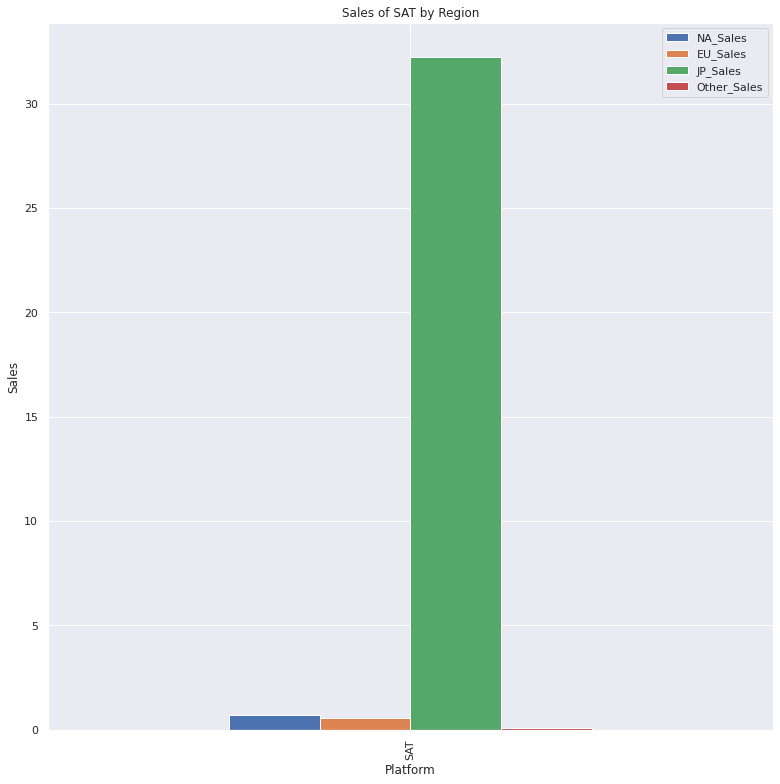

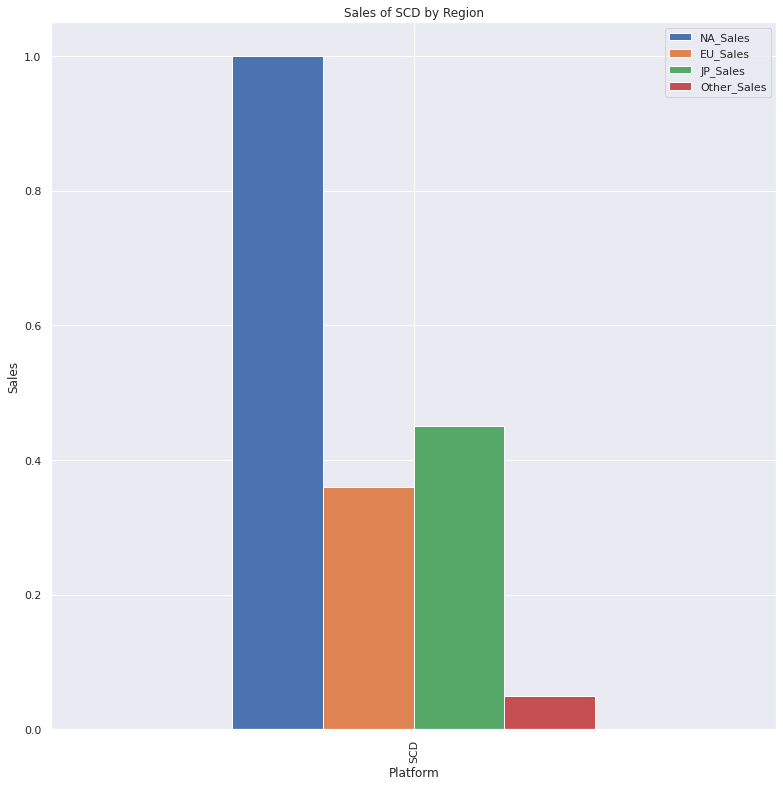

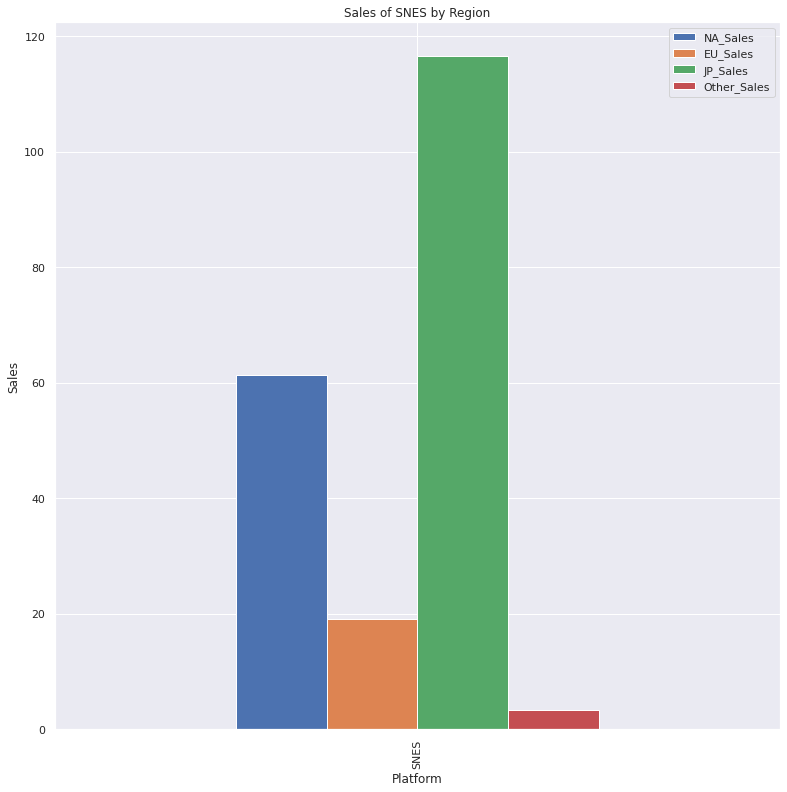

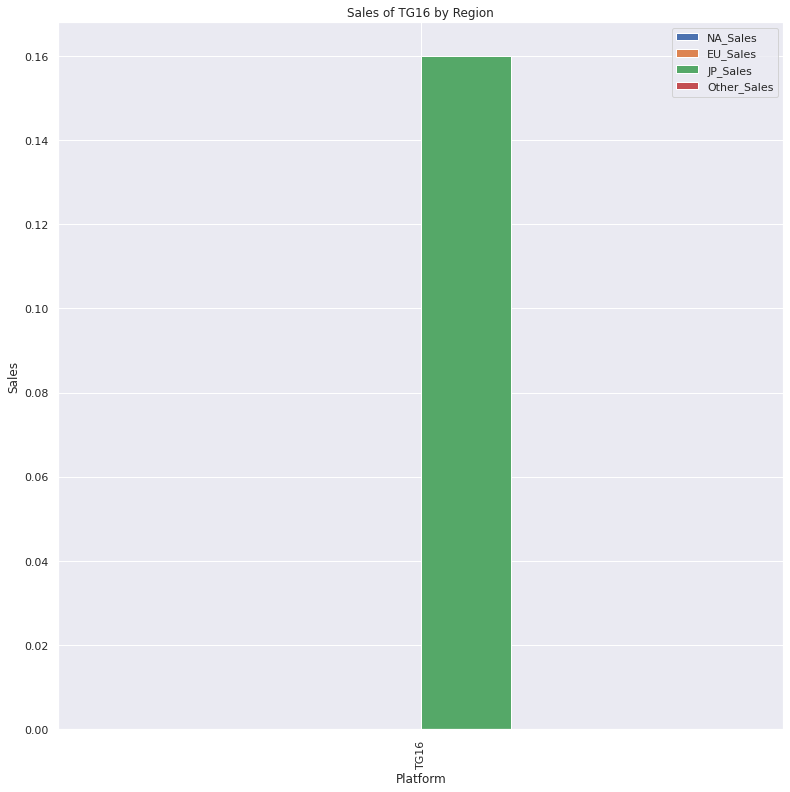

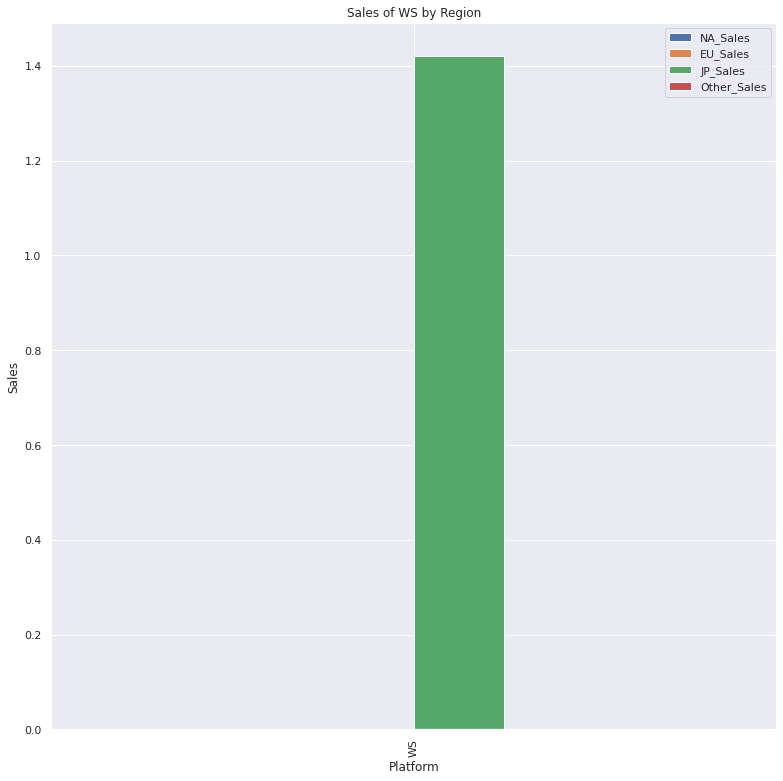

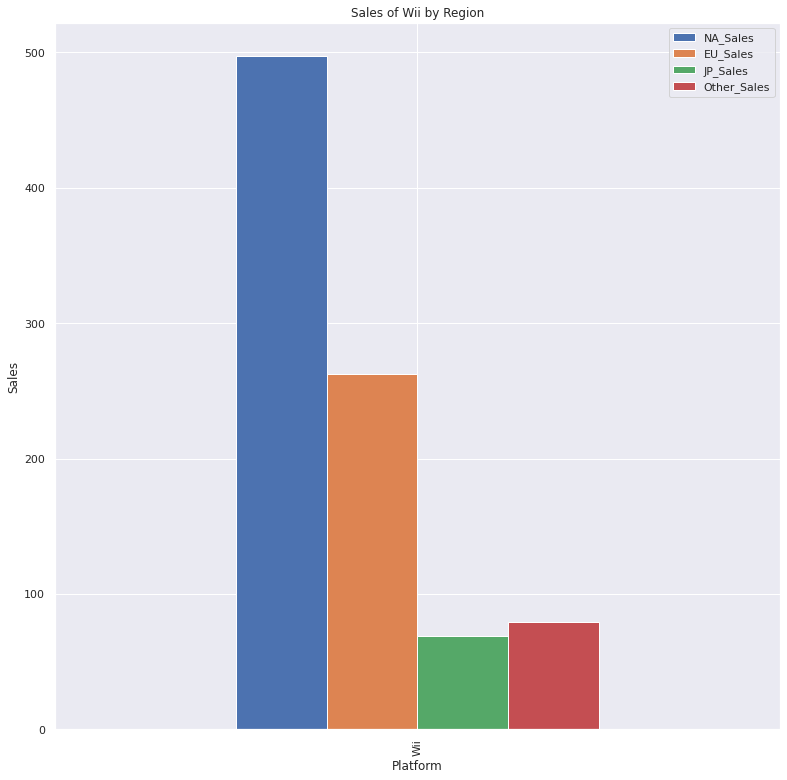

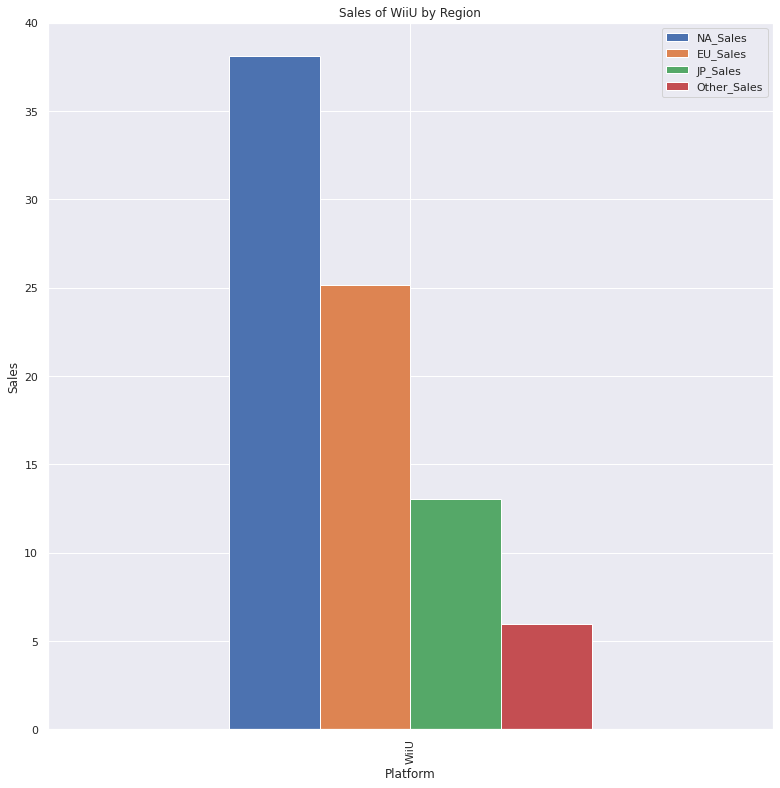

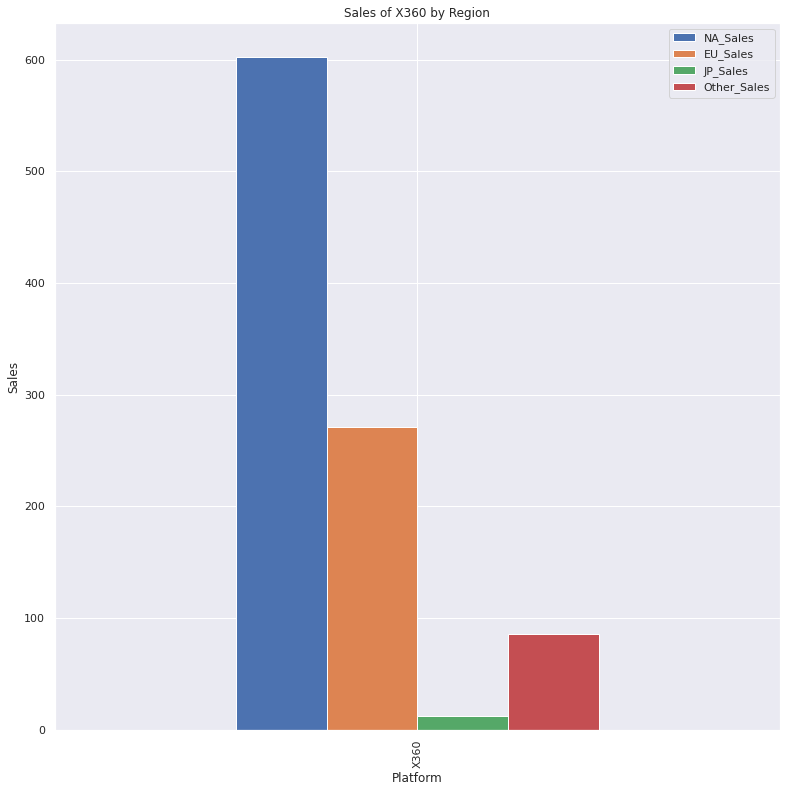

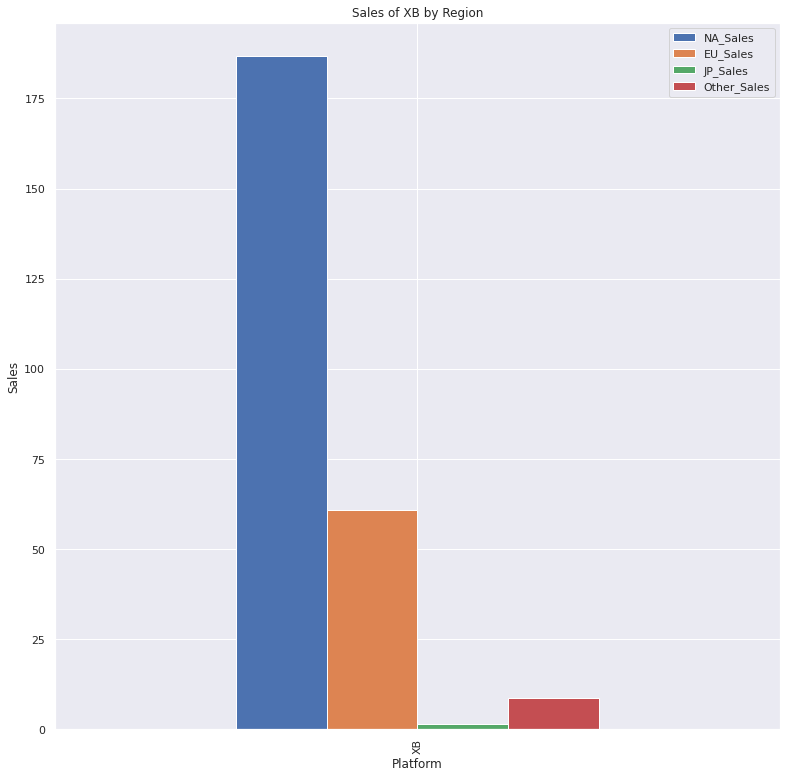

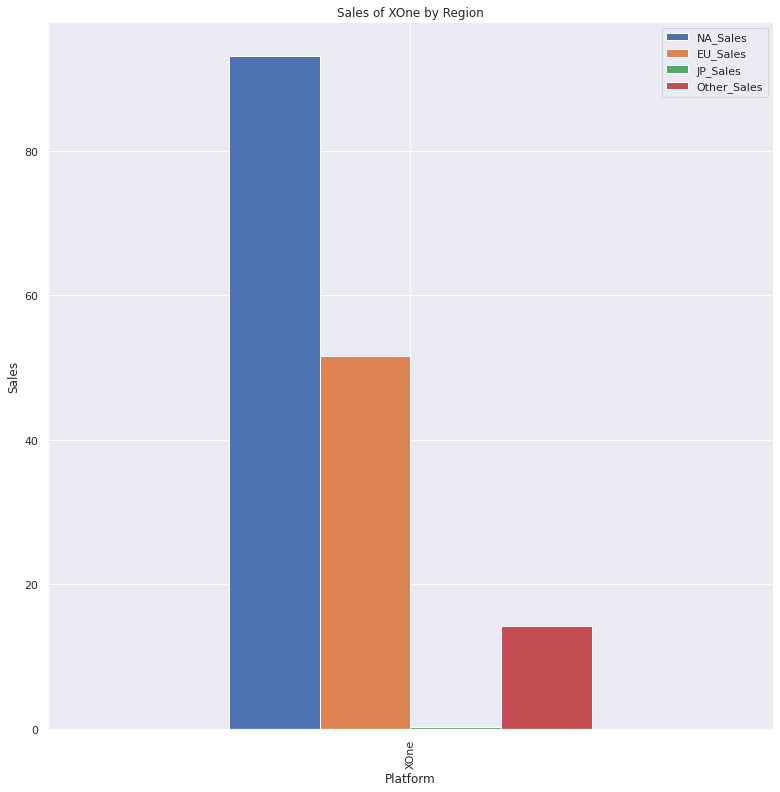

In [197]:
#Individual sales by platform by region
col = platform_by_region_df.columns.to_list()
for i in platform_by_region_df.index.to_list():
  platform_by_region_df.loc[platform_by_region_df.index == i]\
                       .plot( y=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']
                             , kind = 'bar')
  plt.ylabel('Sales')
  plt.title(f'Sales of {i} by Region')
  plt.show()
  print('\n')

Figures above shows the sales of each platform by region seperated by each platform.

In [198]:
#12. Plot the Sales in all regions as per Platform , you need to create a boxplot for that
#which will show the distribution of sales as per platform
df['total_sales'] = df['NA_Sales']\
                    +df['EU_Sales']\
                    +df['JP_Sales']\
                    +df['Other_Sales']                                  

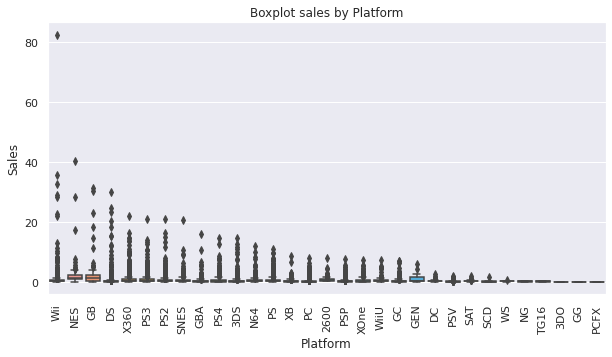

In [199]:
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=90)
sns.boxplot(x='Platform', y='total_sales', data= df)
plt.ylabel('Sales')
plt.title('Boxplot sales by Platform')
plt.show()

Boxplot of each platform.

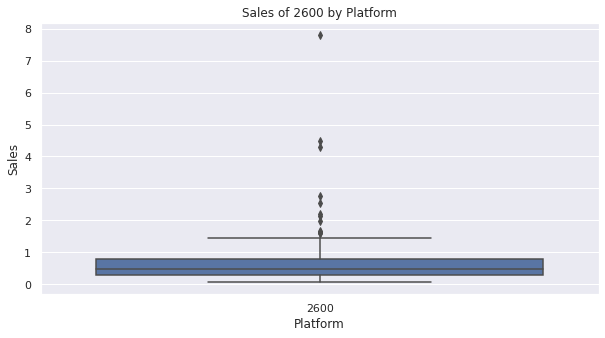

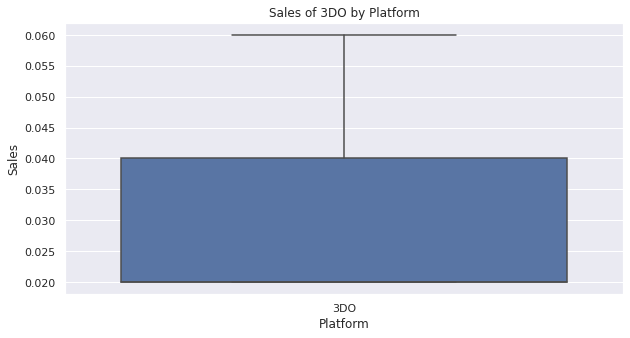

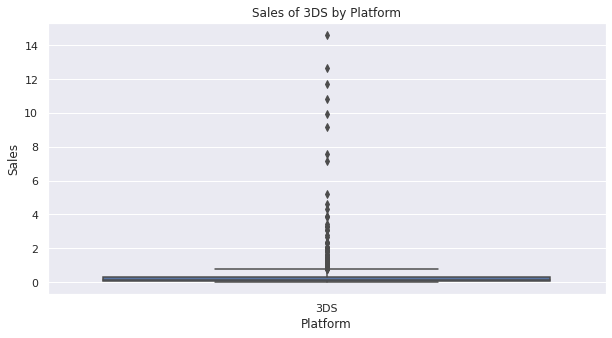

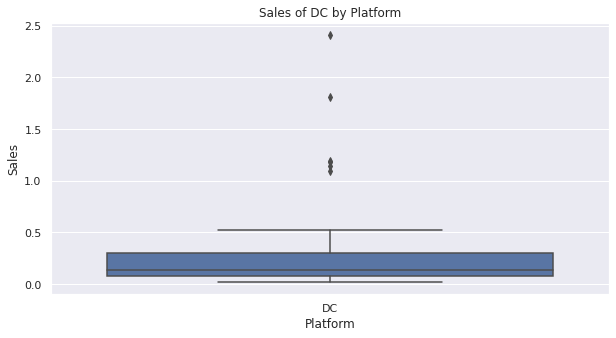

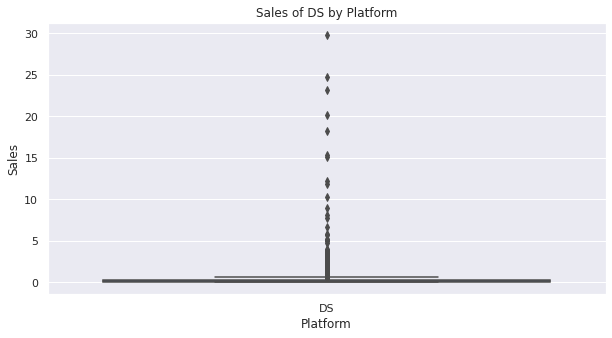

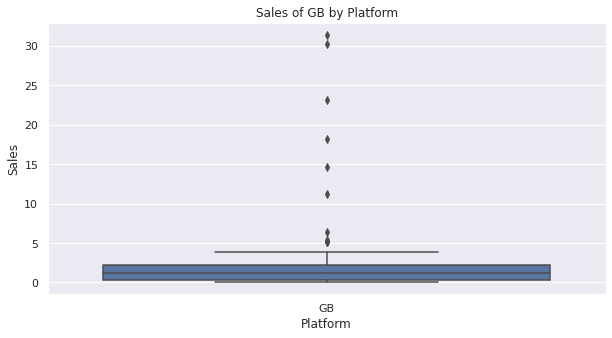

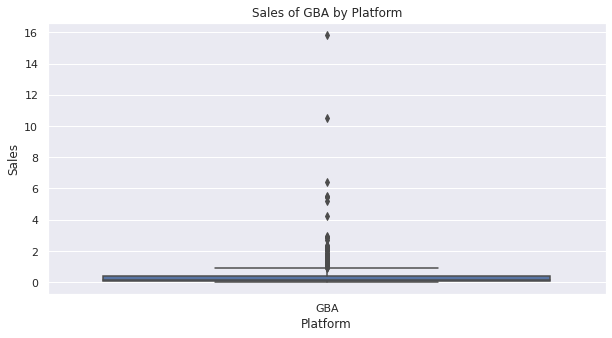

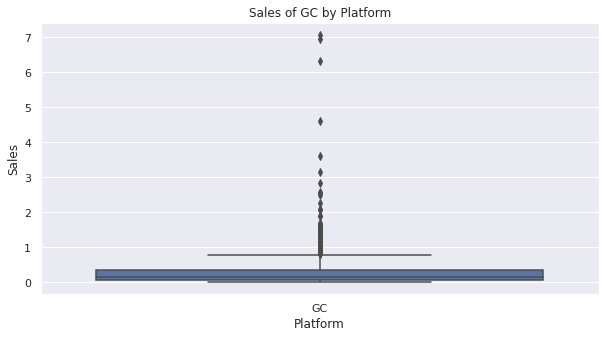

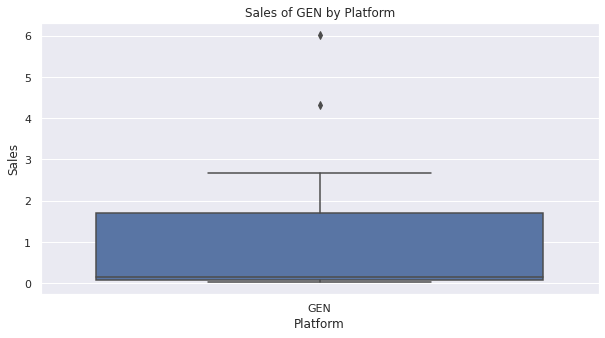

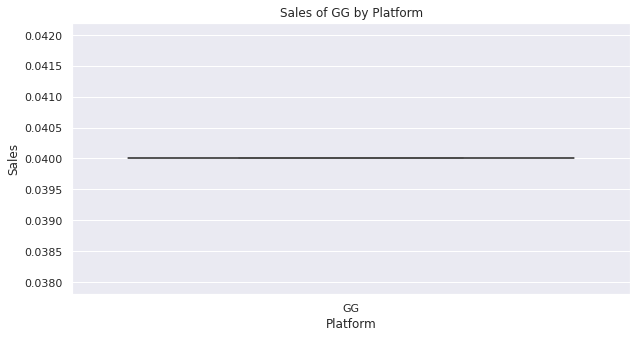

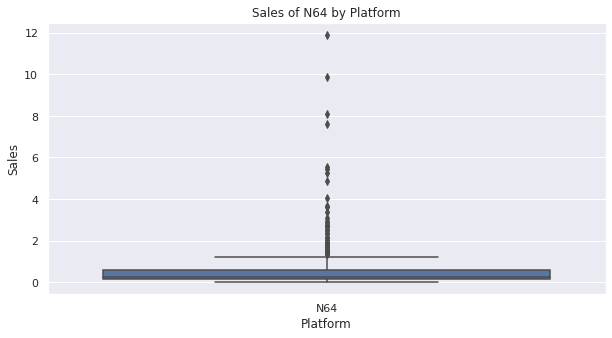

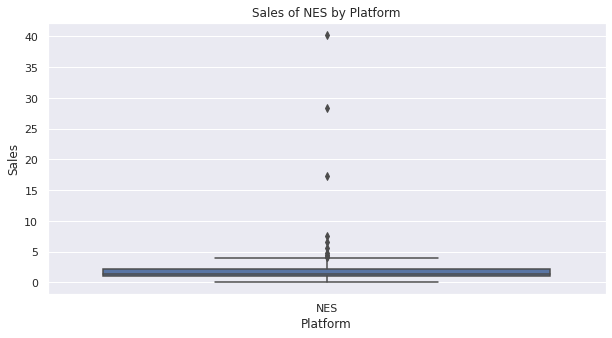

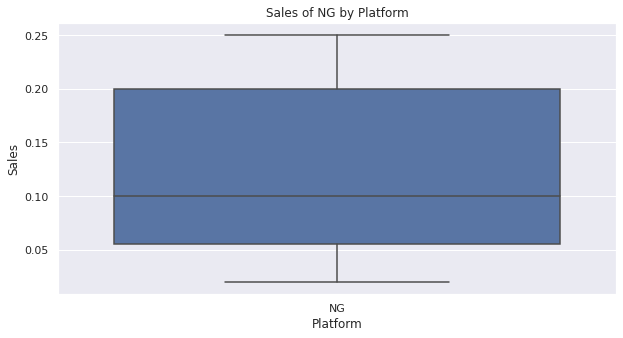

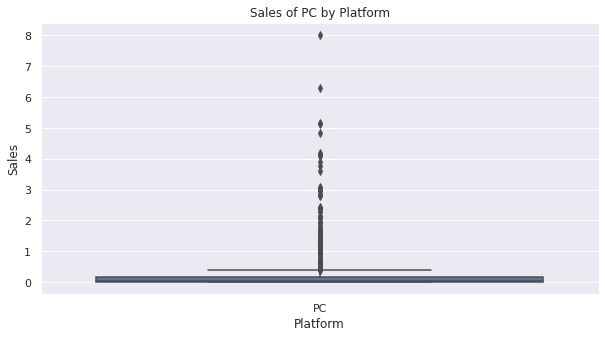

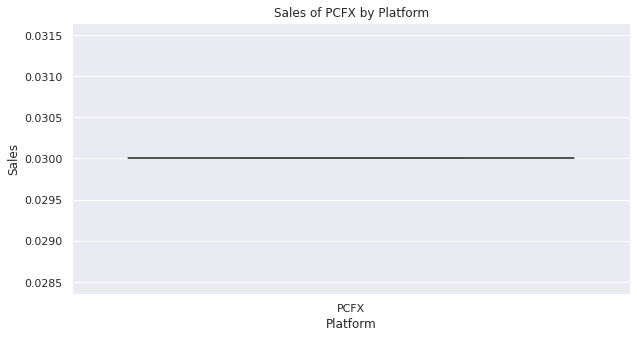

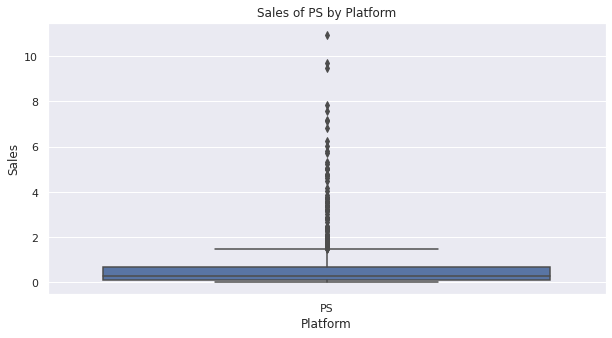

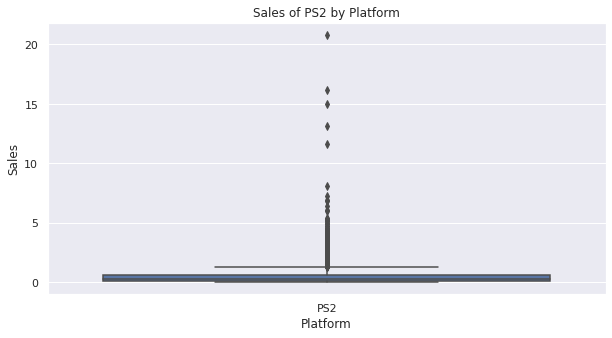

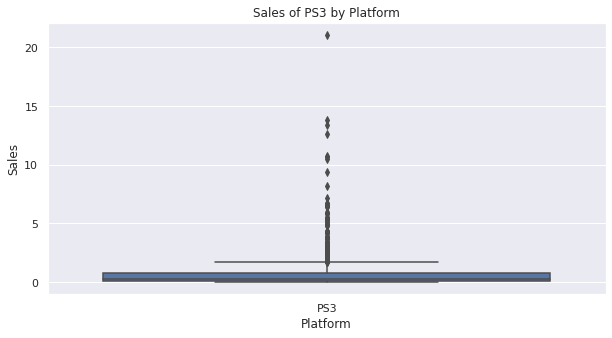

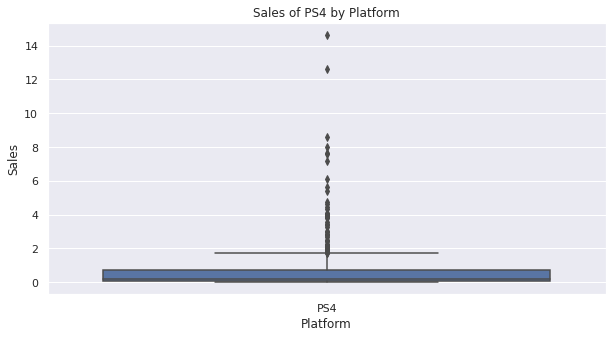

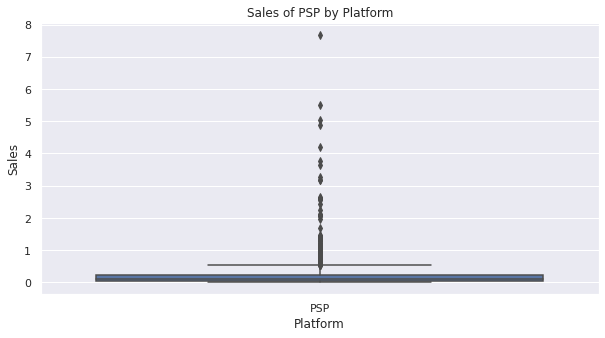

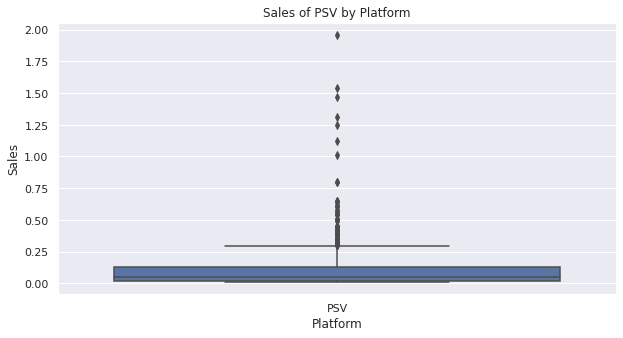

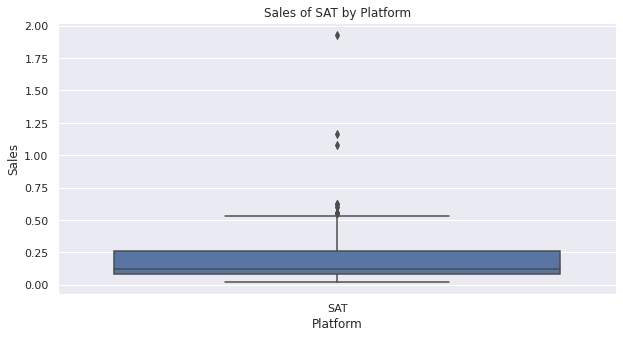

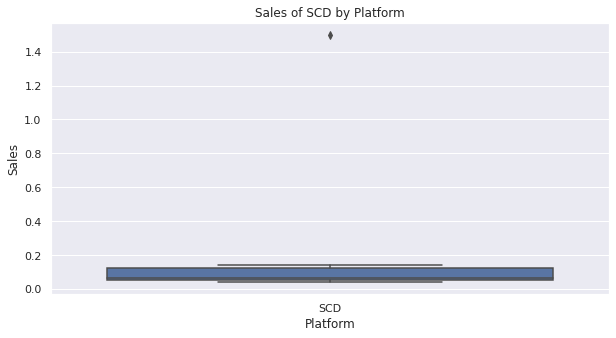

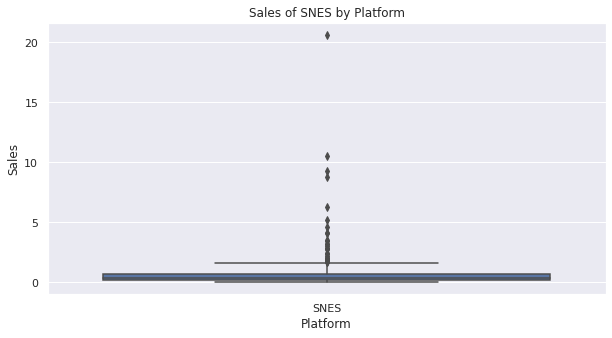

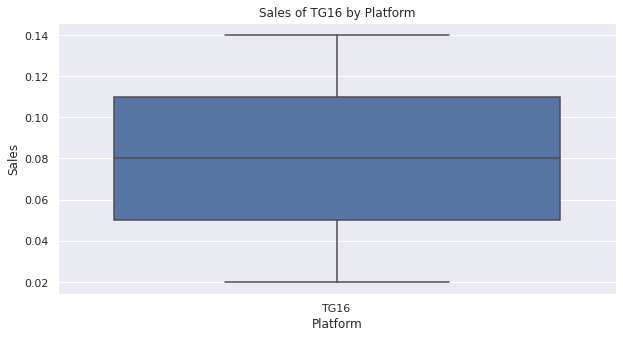

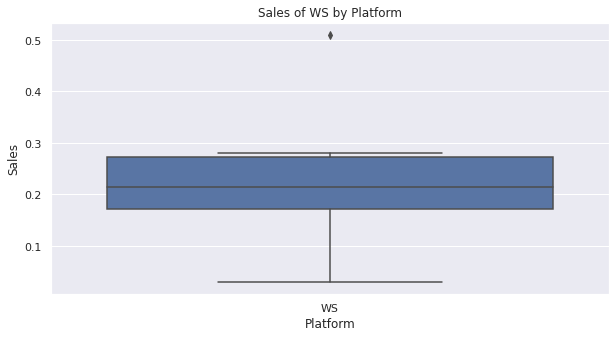

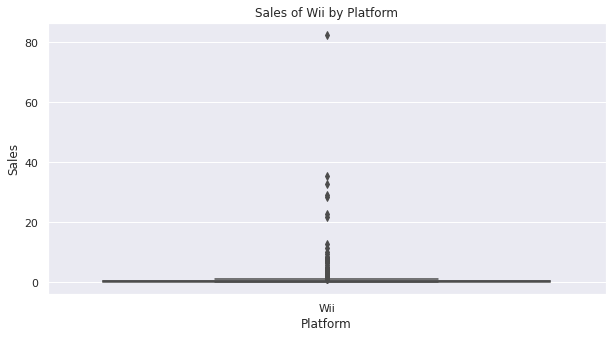

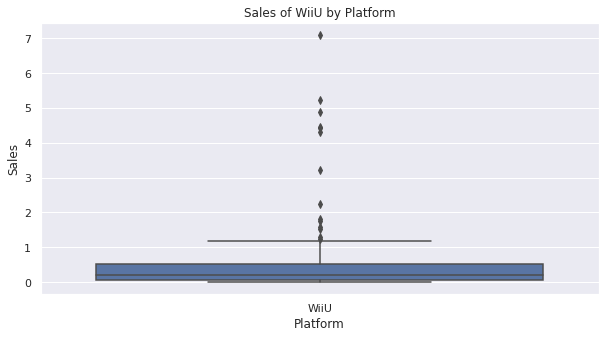

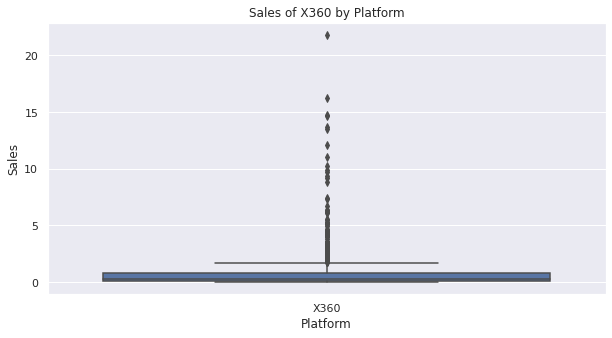

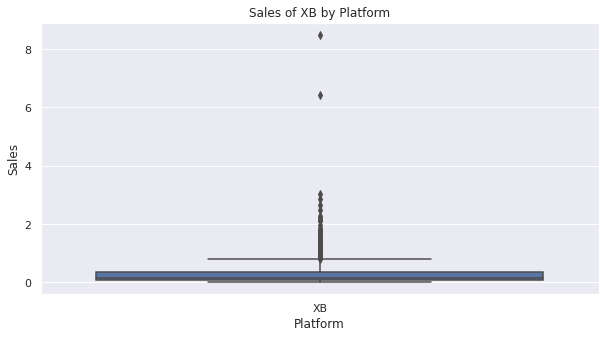

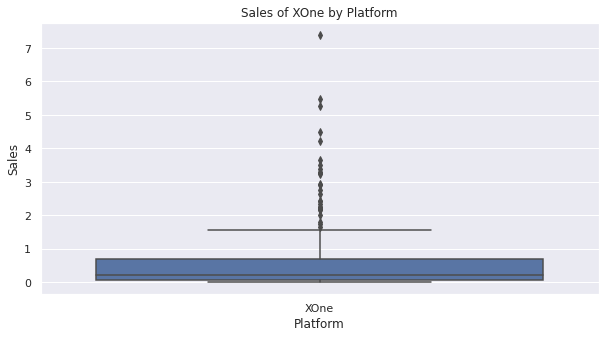

In [200]:
for i in platform_by_region_df.index.to_list():
  sns.set(rc={'figure.figsize':(10,5)})
  sns.boxplot(x='Platform', y='total_sales', data= df.loc[df.Platform == i])
  plt.ylabel('Sales')
  plt.title(f'Sales of {i} by Platform')
  plt.show()
  print('\n')

Boxplot of each platform seperated out.

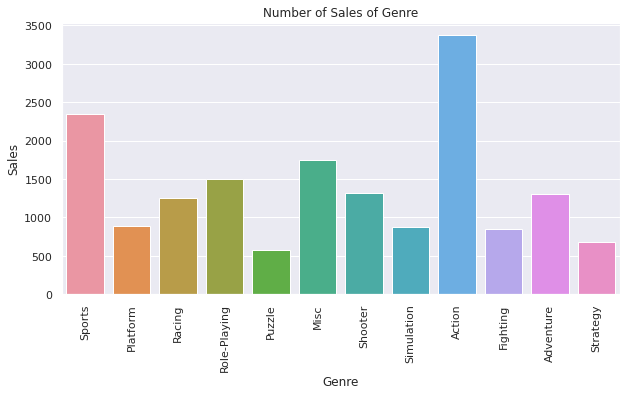

In [201]:
#13. Find out which Genre games are sold in highest numbers
sns.set(rc={'figure.figsize':(10,5)})
plt.xticks(rotation=90)
sns.countplot(x='Genre', data =df)
plt.ylabel('Sales')
plt.title(f'Number of Sales of Genre')
plt.show()

Bar graph showing the number of sales in genre.

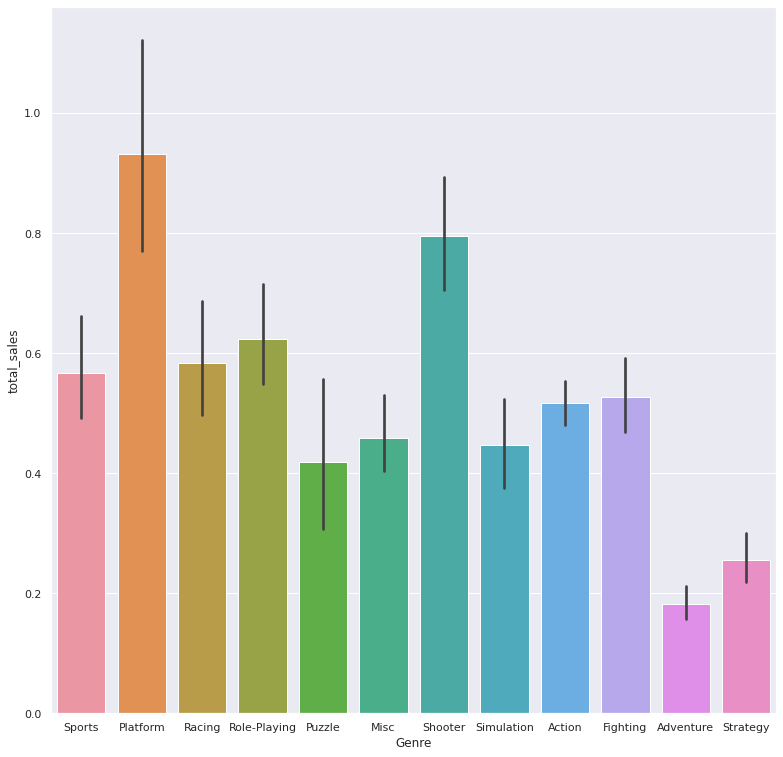

In [215]:
#14. Try to find out global sales as per Genre
sns.barplot(x='Genre', y = 'total_sales', data=df)

Bar graph showing global sales by genre.

#Extra

Text(0.5, 1.0, 'Pie Graph of Number of JP Sales by Genre')

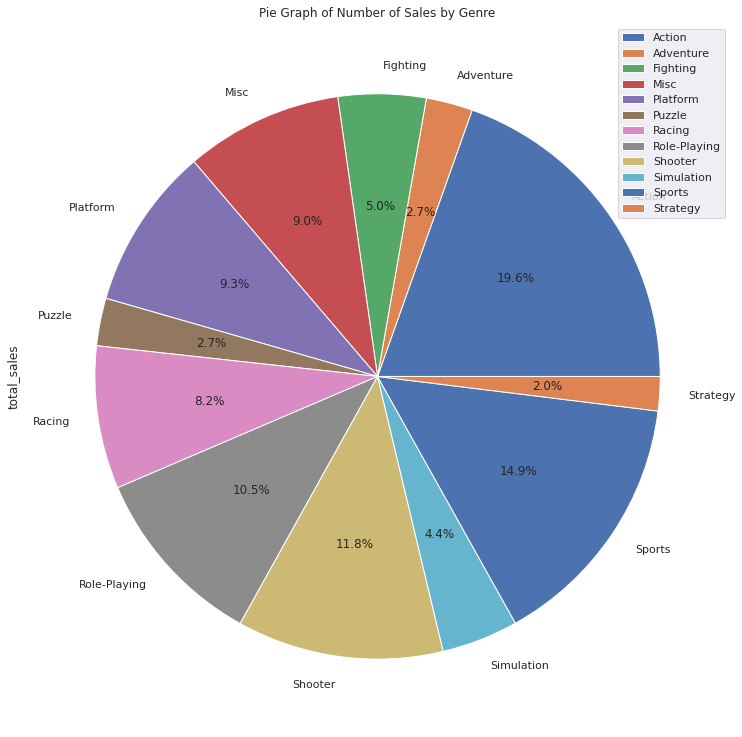

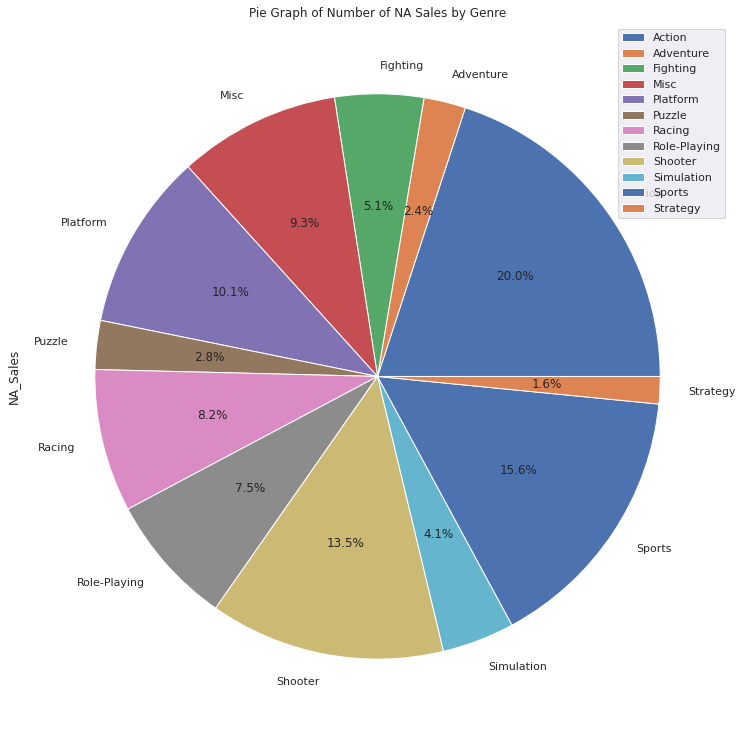

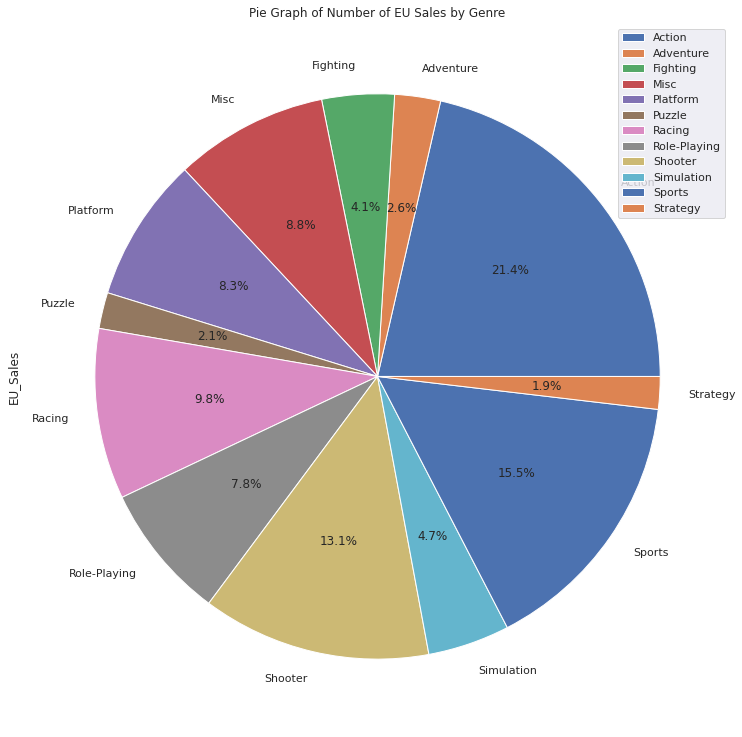

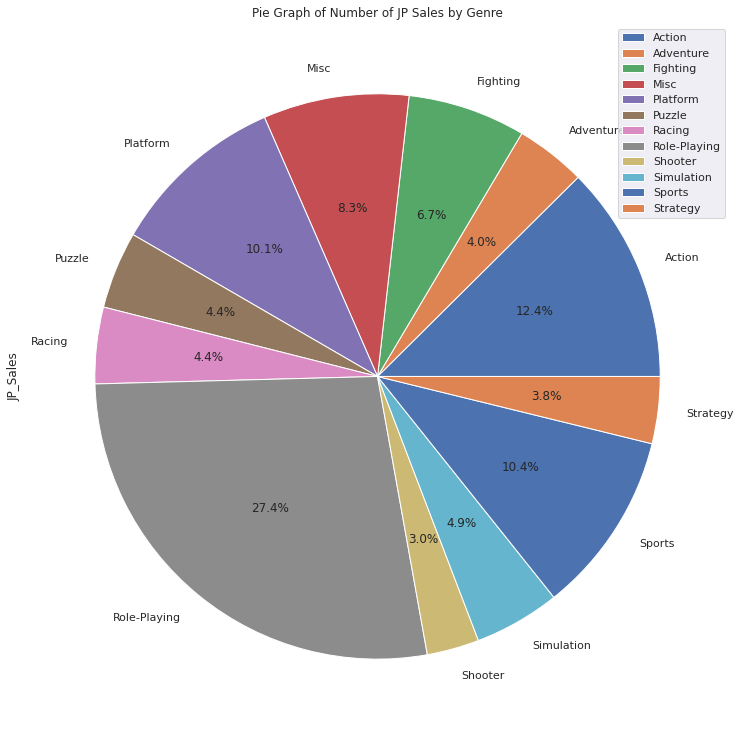

In [203]:
#World Genre precent
sns.set(rc={'figure.figsize':(13,13)})
df.groupby('Genre')[['total_sales']].sum()\
  .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Sales by Genre")
#NA Genre precent
df.groupby('Genre')[['NA_Sales']].sum()\
  .plot(kind='pie', y='NA_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of NA Sales by Genre")
#EU Genre precent
df.groupby('Genre')[['EU_Sales']].sum()\
  .plot(kind='pie', y='EU_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of EU Sales by Genre")
#JP Genre precent
df.groupby('Genre')[['JP_Sales']].sum()\
  .plot(kind='pie', y='JP_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of JP Sales by Genre")

The Precentage of Genres by Sales.

,total_sales
Rating,
AO,1.96
E,2435.81
E10+,655.60
EC,1.75
K-A,4.32
M,1473.79
RP,0.09
T,1493.35


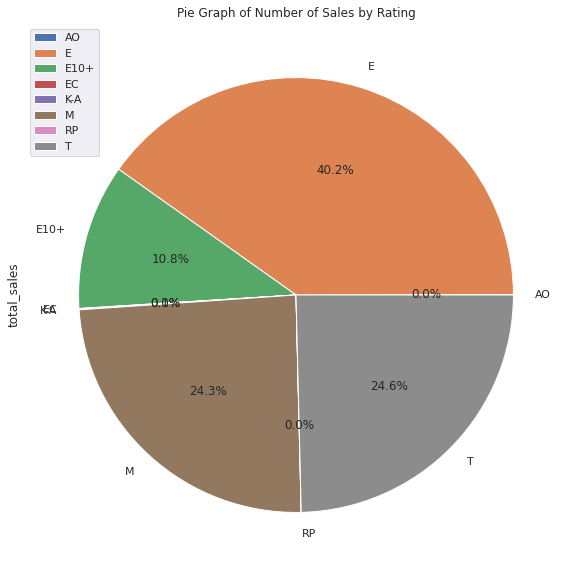

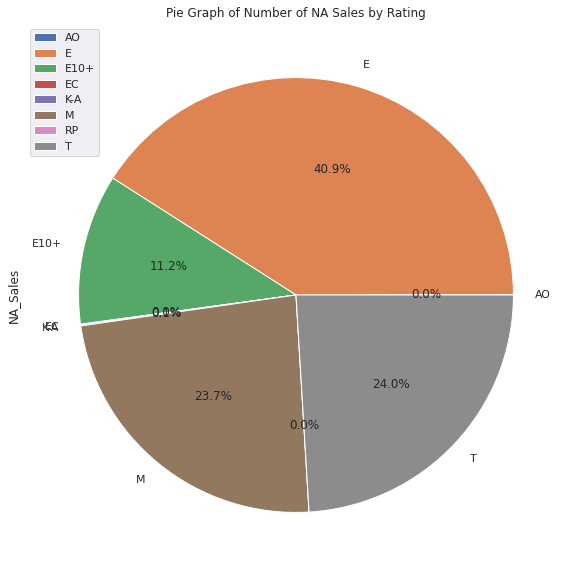

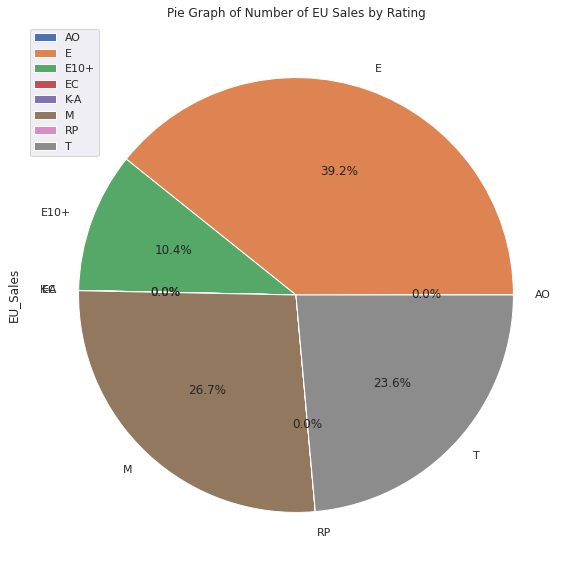

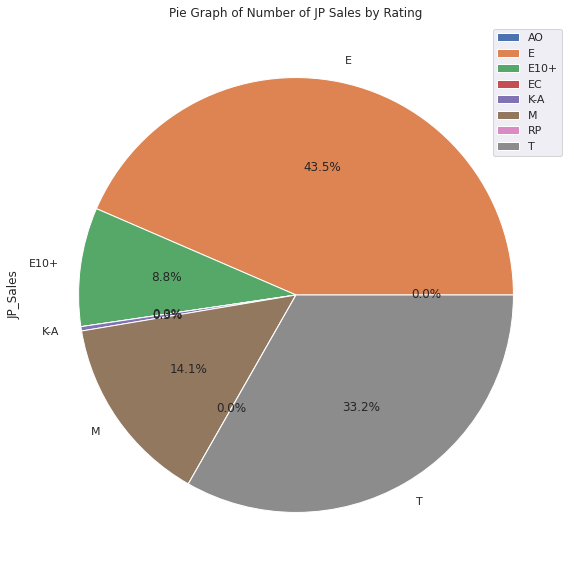

In [204]:

sns.set(rc={'figure.figsize':(10,10)})
df.groupby('Rating')[['total_sales']].sum()\
  .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Sales by Rating")
df.groupby('Rating')[['NA_Sales']].sum()\
  .plot(kind='pie', y='NA_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of NA Sales by Rating")
df.groupby('Rating')[['EU_Sales']].sum()\
  .plot(kind='pie', y='EU_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of EU Sales by Rating")
df.groupby('Rating')[['JP_Sales']].sum()\
  .plot(kind='pie', y='JP_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of JP Sales by Rating")
df.groupby('Rating')[['total_sales']].sum()

The Precentage of Rating by Sales.

Text(0.5, 1.0, 'Pie Graph of Number of JP Sales by Publisher')

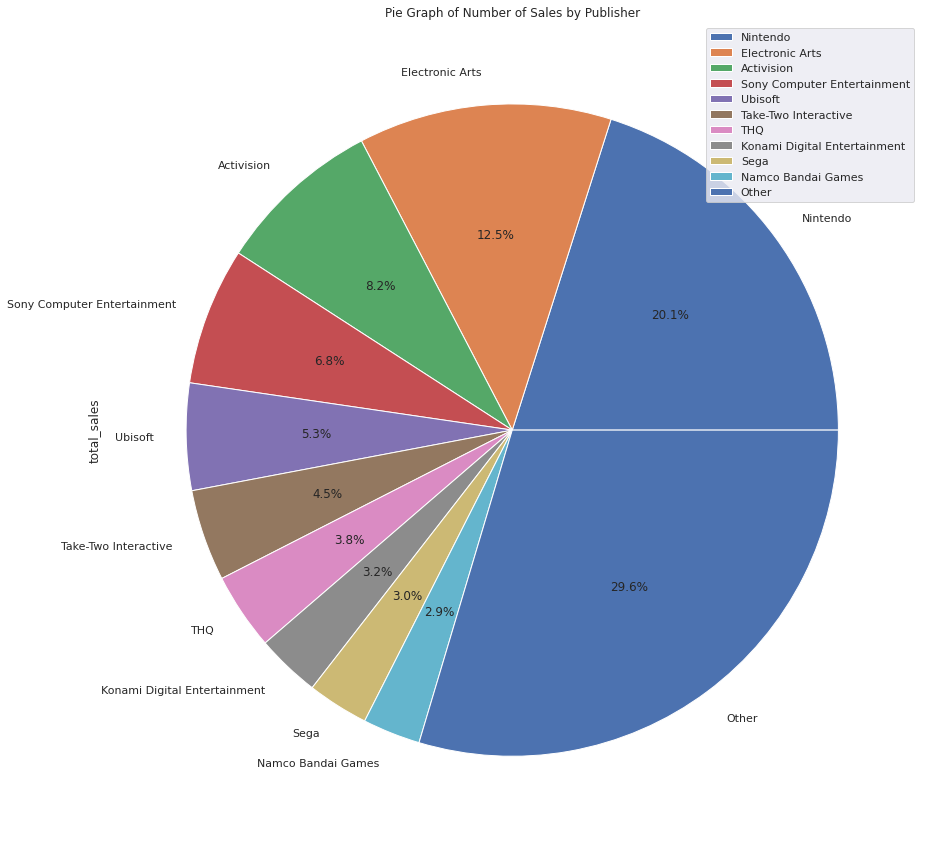

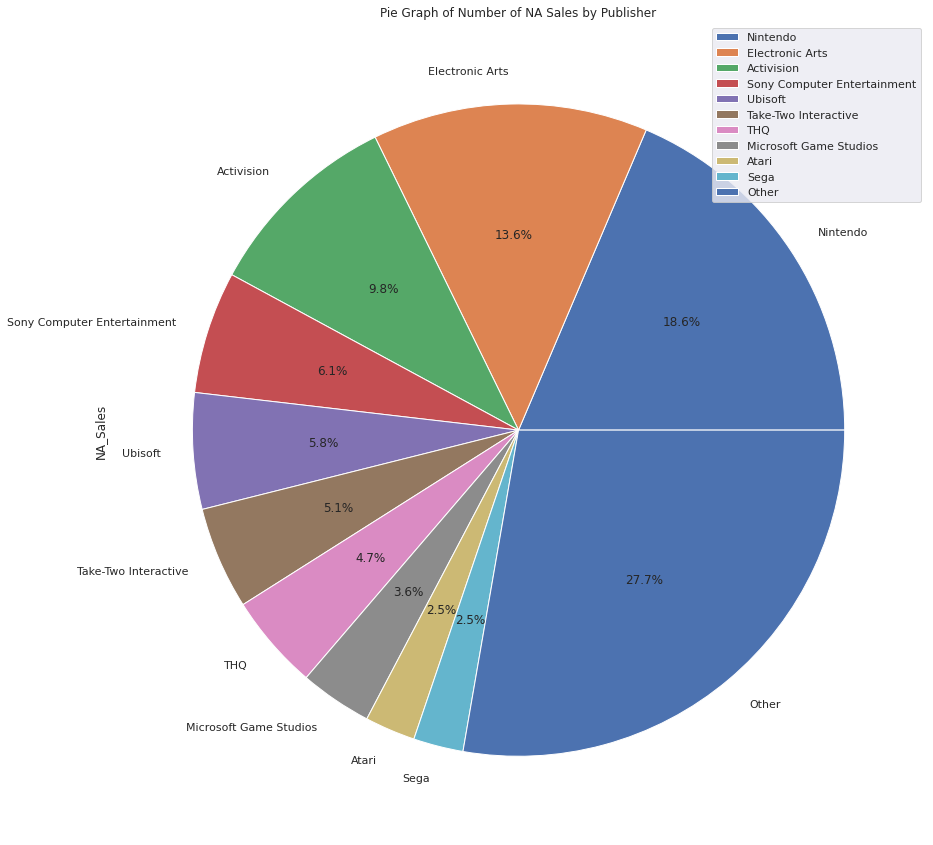

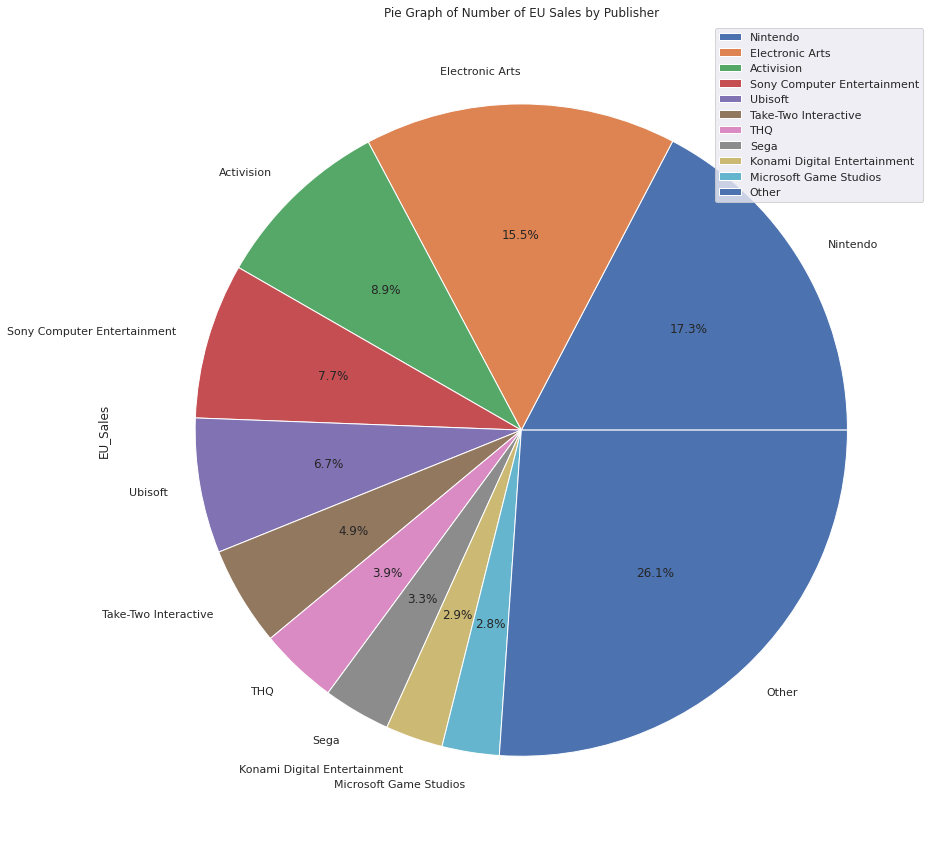

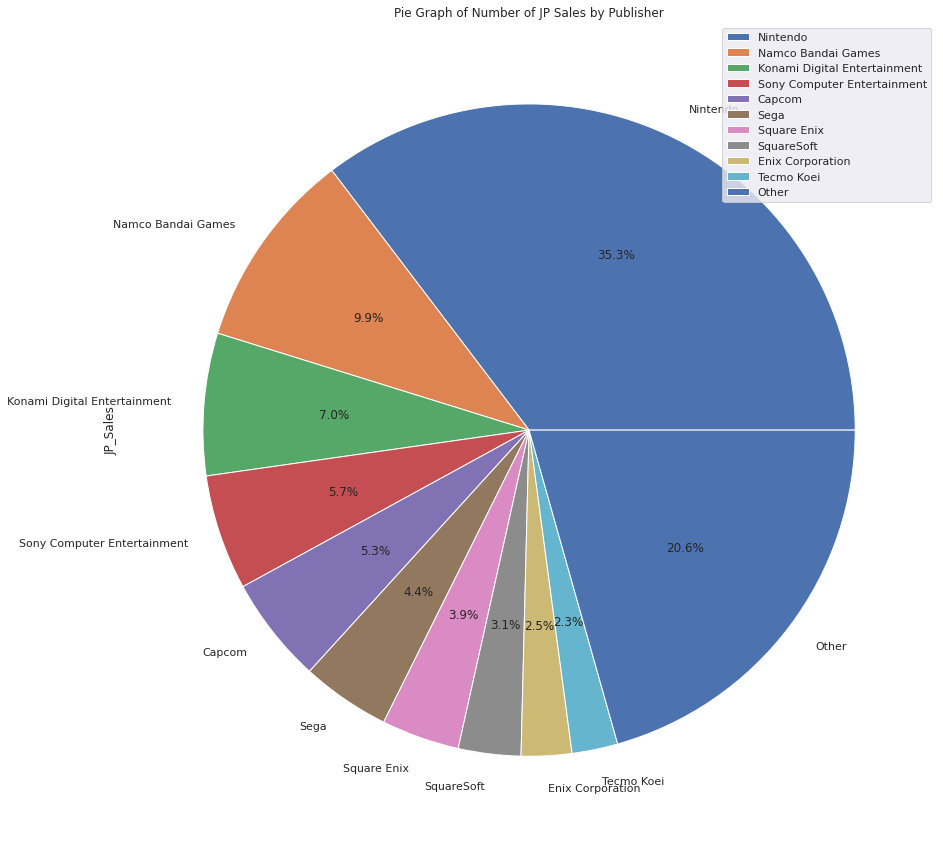

In [205]:
#World Publisher pie charts
pub_pre_df = df.groupby('Publisher')[['total_sales']].sum()\
  .sort_values('total_sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Publisher':'Other', 'total_sales':rest_pre.sum()})

sns.set(rc={'figure.figsize':(15,15)})
pub_pre_df.head(10).append(temp.set_index('Publisher'))\
  .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Sales by Publisher")
#NA
pub_pre_df = df.groupby('Publisher')[['NA_Sales']].sum()\
  .sort_values('NA_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Publisher':'Other', 'NA_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Publisher'))\
  .plot(kind='pie', y='NA_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of NA Sales by Publisher")
#EU
pub_pre_df = df.groupby('Publisher')[['EU_Sales']].sum()\
  .sort_values('EU_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Publisher':'Other', 'EU_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Publisher'))\
  .plot(kind='pie', y='EU_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of EU Sales by Publisher")
#JP
pub_pre_df = df.groupby('Publisher')[['JP_Sales']].sum()\
  .sort_values('JP_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Publisher':'Other', 'JP_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Publisher'))\
  .plot(kind='pie', y='JP_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of JP Sales by Publisher")

Top 10 Publishers by Sales.

Text(0.5, 1.0, 'Pie Graph of Number of Nintendo Sales by Rating')

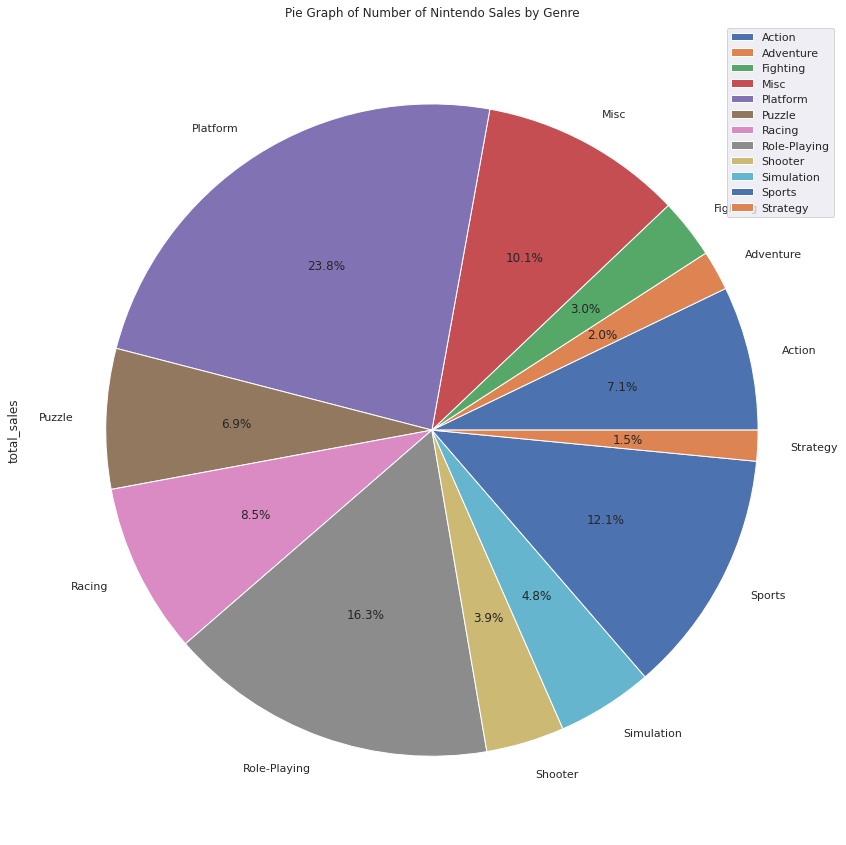

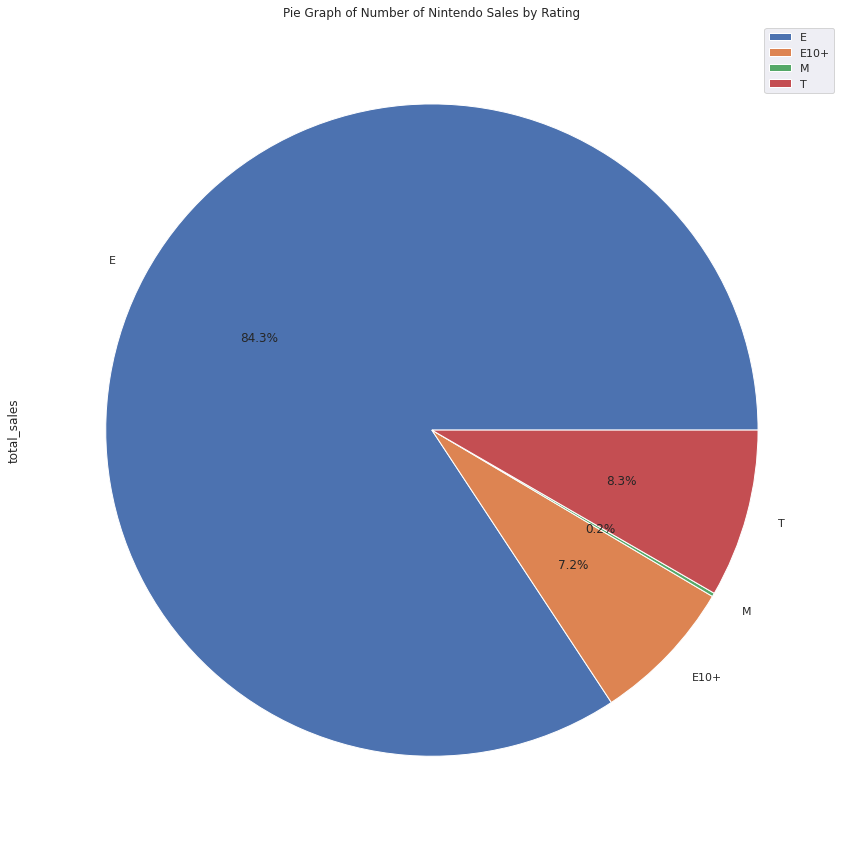

In [206]:
#Best of nintendo Genre, Rating pie chart for world
best_of_nintendo = df[['Publisher', 'total_sales', 'Genre', 'Rating']].loc[df.Publisher=='Nintendo']
best_of_nintendo.groupby('Genre')[['total_sales']].sum()\
         .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Nintendo Sales by Genre")

best_of_nintendo.groupby('Rating')[['total_sales']].sum()\
         .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Nintendo Sales by Rating")

The best Genre and Rating of Nintendo. 

Text(0.5, 1.0, 'Pie Graph of Number of JP Sales by Platform')

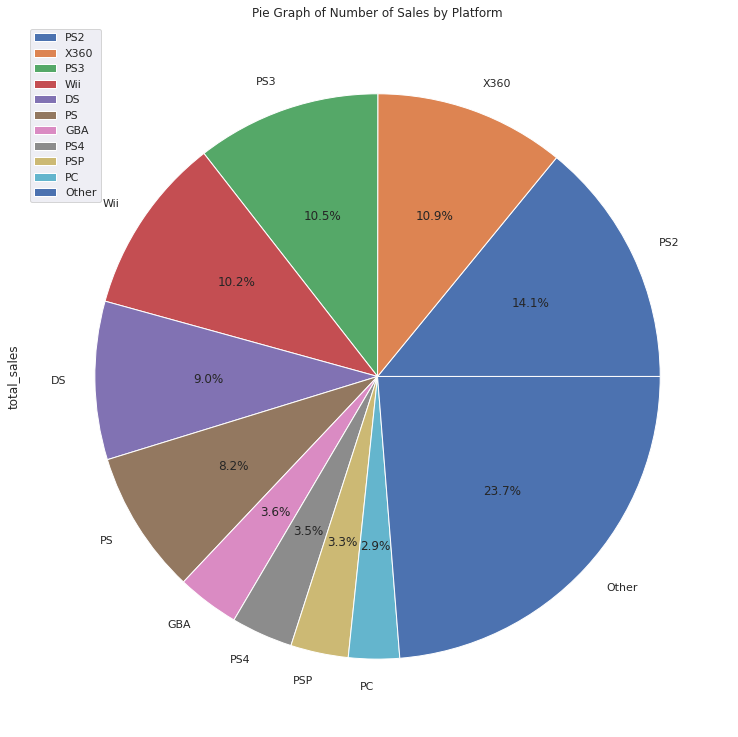

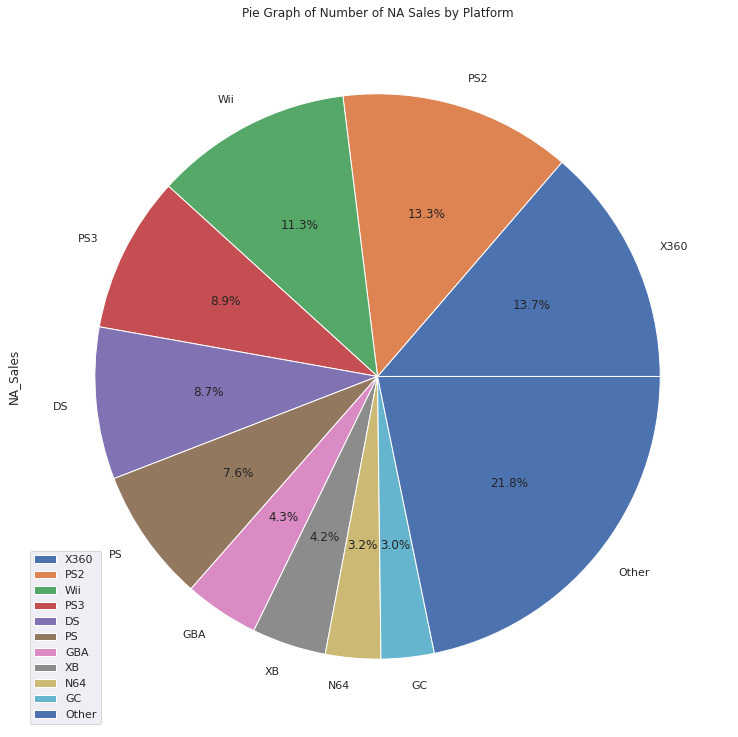

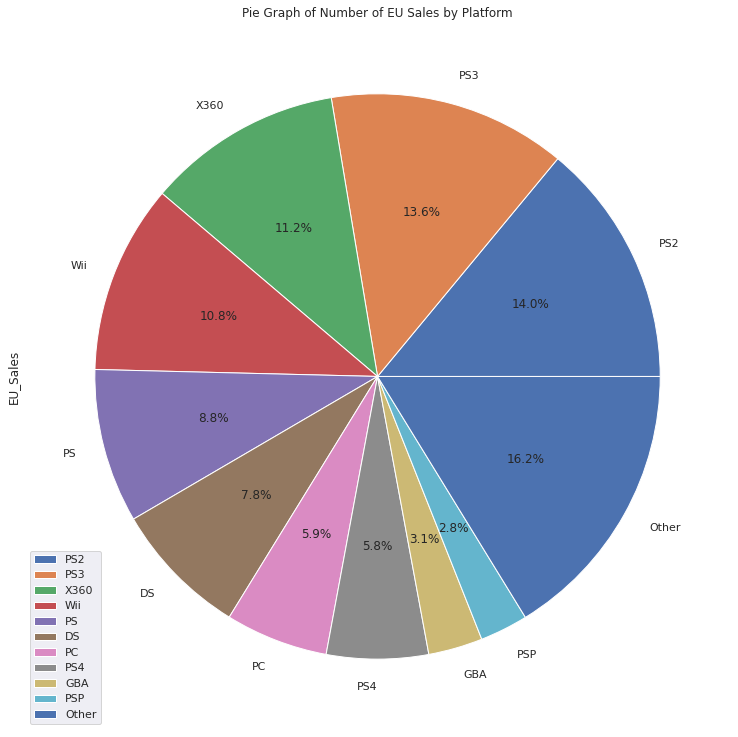

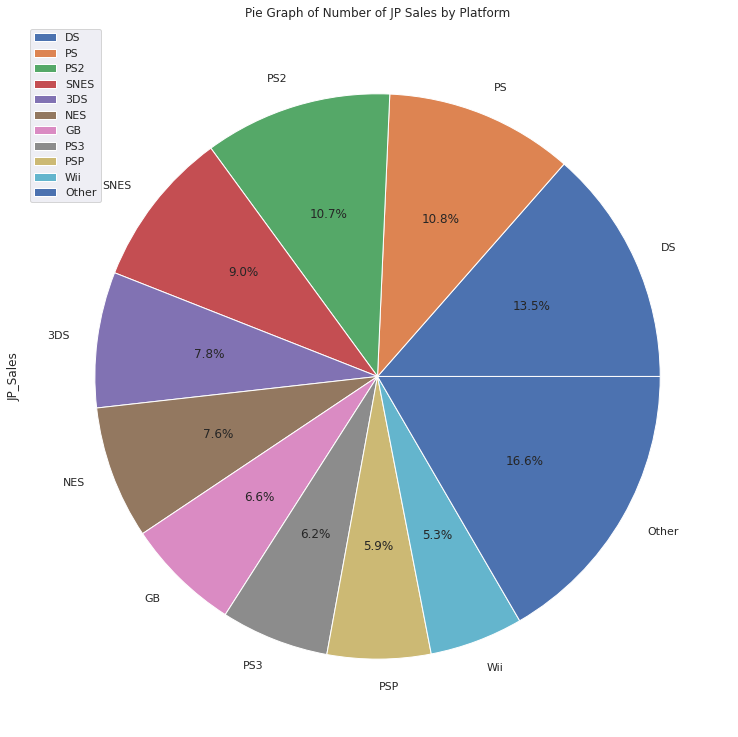

In [207]:
#World Platform Pie Charts
pub_pre_df = df.groupby('Platform')[['total_sales']].sum()\
  .sort_values('total_sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Platform':'Other', 'total_sales':rest_pre.sum()})

sns.set(rc={'figure.figsize':(13,13)})
pub_pre_df.head(10).append(temp.set_index('Platform'))\
  .plot(kind='pie', y='total_sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of Sales by Platform")
#NA
pub_pre_df = df.groupby('Platform')[['NA_Sales']].sum()\
  .sort_values('NA_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Platform':'Other', 'NA_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Platform'))\
  .plot(kind='pie', y='NA_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of NA Sales by Platform")
#EU
pub_pre_df = df.groupby('Platform')[['EU_Sales']].sum()\
  .sort_values('EU_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Platform':'Other', 'EU_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Platform'))\
  .plot(kind='pie', y='EU_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of EU Sales by Platform")
#JP
pub_pre_df = df.groupby('Platform')[['JP_Sales']].sum()\
  .sort_values('JP_Sales',ascending = False)
rest_pre = pub_pre_df.iloc[10:]
temp = pd.DataFrame({'Platform':'Other', 'JP_Sales':rest_pre.sum()})

pub_pre_df.head(10).append(temp.set_index('Platform'))\
  .plot(kind='pie', y='JP_Sales', autopct='%1.1f%%')
plt.title("Pie Graph of Number of JP Sales by Platform")

The top 10 Precentage of Platforms by Sales.

[Text(0.5, 1.0, 'Correlation of Sales and Scores')]

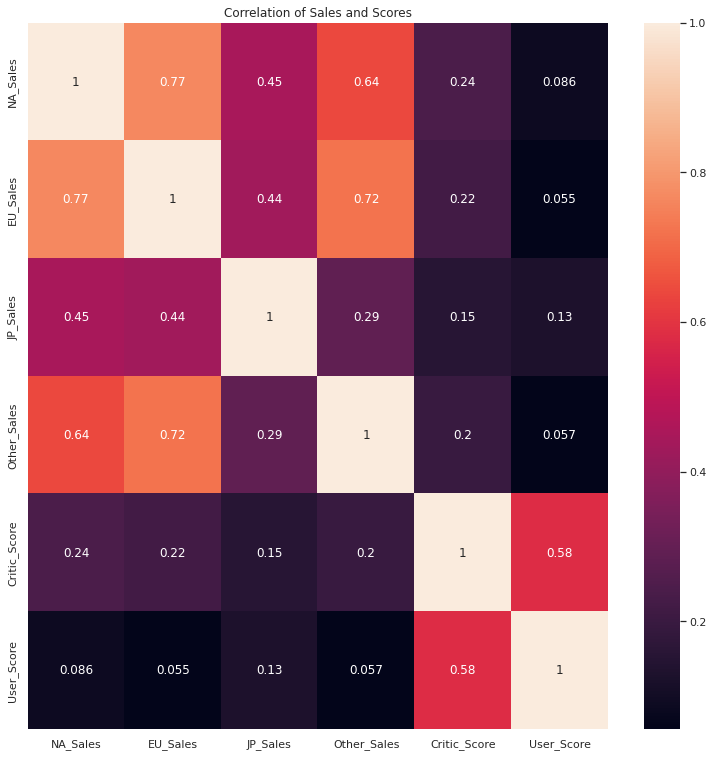

In [214]:
sns.heatmap(df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales', 'Critic_Score','User_Score']].corr(), annot = True).set(title = 'Correlation of Sales and Scores')